# Housing Price Prediction

### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Which variables are significant in predicting the price of a house, and

### How well those variables describe the price of a house.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import metrics 
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [108]:
# importing train csv file data
df_train = pd.read_csv('train.csv')
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.00,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.00,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.00,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [109]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00",...,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00",...,857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


In [110]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [111]:
df_train.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

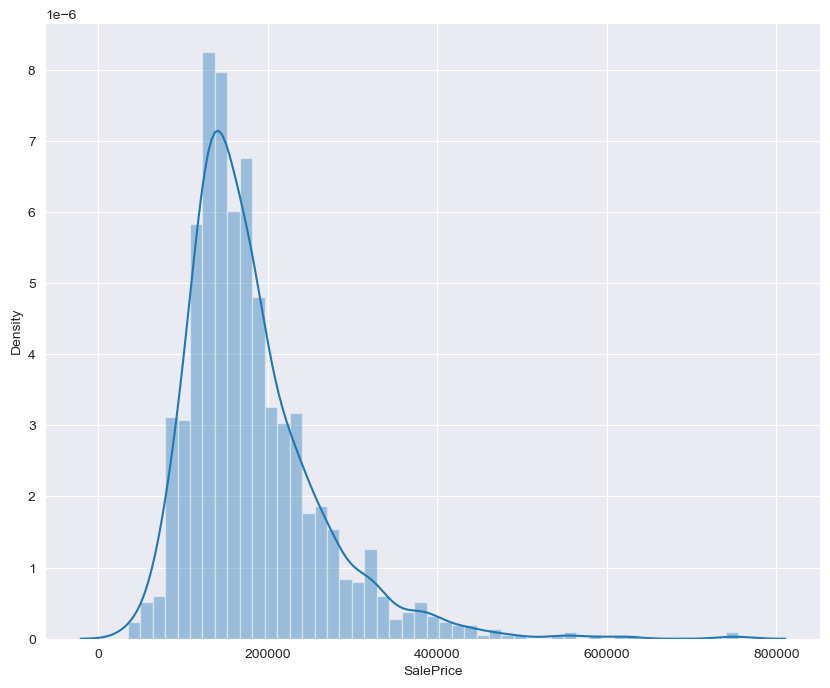

In [112]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df_train['SalePrice']);

### target variable is right-skewed

In [113]:
## Check the skewness of target variable
df_train['SalePrice'].skew()

1.8828757597682129

### skewness is greater than 1 so the target variable is highly skewed

In [114]:
## Check the kurtosis of target variable
df_train['SalePrice'].kurt()

6.536281860064529

### The kurtosis is greater than 1, so the distribution of target variable is highly peaked.

### So, we will log transform our target variable

In [115]:
## Log transform the target variable
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [116]:
## Check the skewness of target variable again
df_train['SalePrice'].skew()

0.12133506220520406

In [117]:
## Check the kurtosis of target variable again
df_train['SalePrice'].kurt()

0.8095319958036296

### Both skewness and kurtosis are less than 1 now.

<Figure size 1000x800 with 0 Axes>

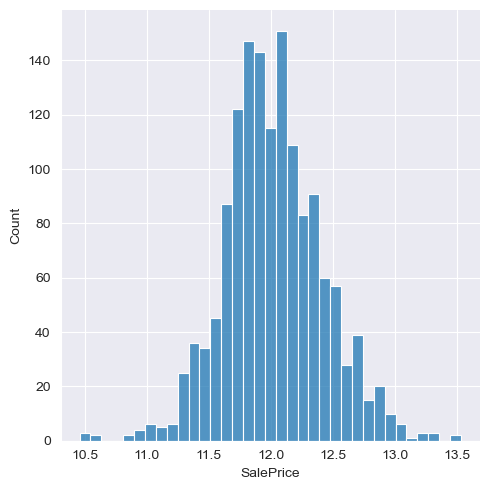

In [118]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.displot(df_train['SalePrice']);


#####  So, our target variable has normal distribution now.

### Data imputation and Data Preprocessing

In [119]:
## Convert three columns to 'object' type as mentioned above
df_train[['MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']] = df_train[['MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']].astype('object')


In [120]:
#converting year to number of years
df_train['YearBuilt'] = 2020 - df_train['YearBuilt']
df_train['YearRemodAdd'] = 2020 - df_train['YearRemodAdd']
df_train['GarageYrBlt'] = 2020 - df_train['GarageYrBlt']
df_train['YrSold'] = 2020 - df_train['YrSold']

In [121]:
## Convert two columns to 'numeric' type as mentioned above
df_train['LotFrontage'] = pd.to_numeric(df_train['LotFrontage'], errors='coerce')
df_train['MasVnrArea'] = pd.to_numeric(df_train['MasVnrArea'], errors='coerce')

In [122]:
#NA in Alley column means No Alley, so we will replace NA by it.
df_train['Alley'].fillna('No Alley', inplace=True)

In [123]:
df_train['MasVnrType'].fillna('None', inplace=True) 

In [124]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
df_train['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [125]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
df_train['PoolQC'].fillna('No Pool', inplace=True) 

In [126]:
#NA in Fence column means No Fence, so we will replace NA by it.
df_train['Fence'].fillna('No Fence', inplace=True) 

In [127]:
df_train['MasVnrArea'].fillna(0, inplace=True) 

In [128]:
df_train['GarageYrBlt'].fillna(0, inplace=True) 

In [129]:
df_train['LotFrontage'].fillna(0, inplace=True) 

In [130]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

df_train['GarageType'].fillna('No Garage', inplace=True) 
df_train['GarageFinish'].fillna('No Garage', inplace=True) 
df_train['GarageQual'].fillna('No Garage', inplace=True) 
df_train['GarageCond'].fillna('No Garage', inplace=True) 

In [131]:
# MiscFeature column has almost 99% null values so we will drop it
df_train= df_train.drop(['MiscFeature','Id'], axis=1)

### Seperating Numeric data from the DF

In [132]:
# all numeric (float and int) variables in the dataset
house_numeric = df_train.select_dtypes(include = ['float64', 'int64'])
house_numeric.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.00,8450,17,17,196.00,706,0,150,856,856,...,0,61,0,0,0,0,0,2,12,12.25
1,80.00,9600,44,44,0.00,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,13,12.11
2,68.00,11250,19,18,162.00,486,0,434,920,920,...,0,42,0,0,0,0,0,9,12,12.32
3,60.00,9550,105,50,0.00,216,0,540,756,961,...,0,35,272,0,0,0,0,2,14,11.85
4,84.00,14260,20,20,350.00,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,12,12.43


In [133]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop([ 'YearBuilt', 'YearRemodAdd', 
                                    
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.00,8450,196.00,706,0,150,856,856,854,0,...,17.00,548,0,61,0,0,0,0,0,12.25
1,80.00,9600,0.00,978,0,284,1262,1262,0,0,...,44.00,460,298,0,0,0,0,0,0,12.11
2,68.00,11250,162.00,486,0,434,920,920,866,0,...,19.00,608,0,42,0,0,0,0,0,12.32
3,60.00,9550,0.00,216,0,540,756,961,756,0,...,22.00,642,0,35,272,0,0,0,0,11.85
4,84.00,14260,350.00,655,0,490,1145,1145,1053,0,...,20.00,836,192,84,0,0,0,0,0,12.43


#### Understanding the numeric data distribution

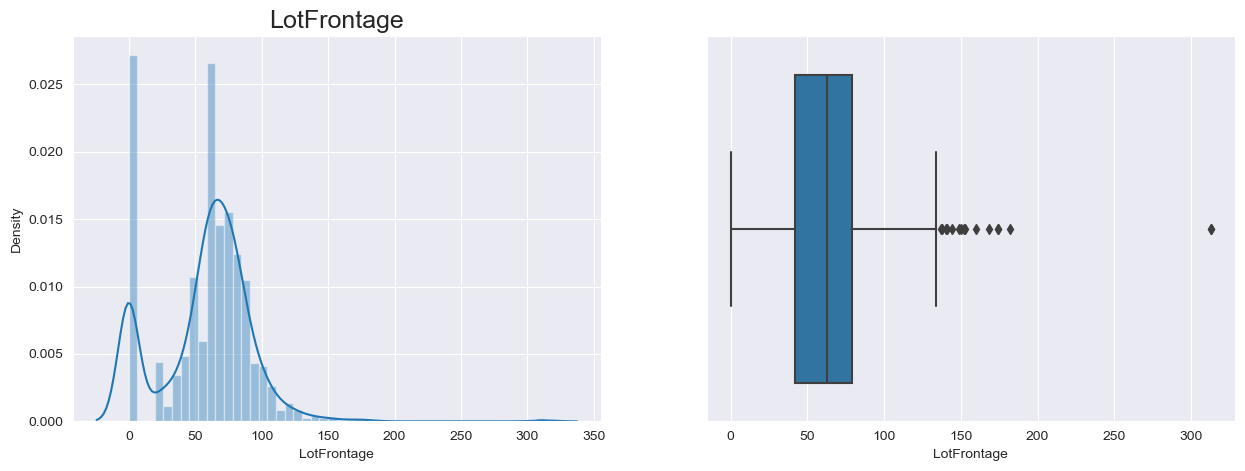

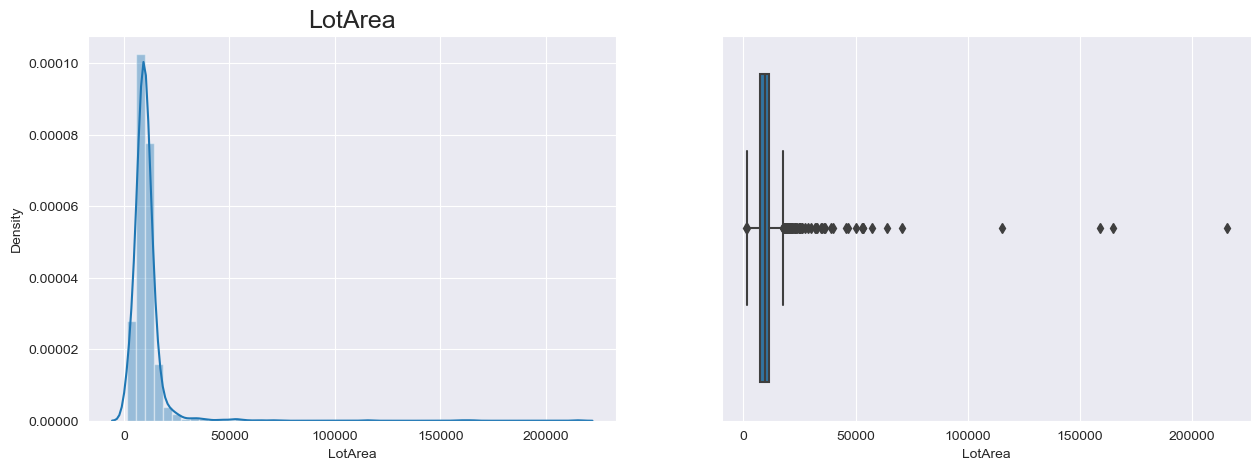

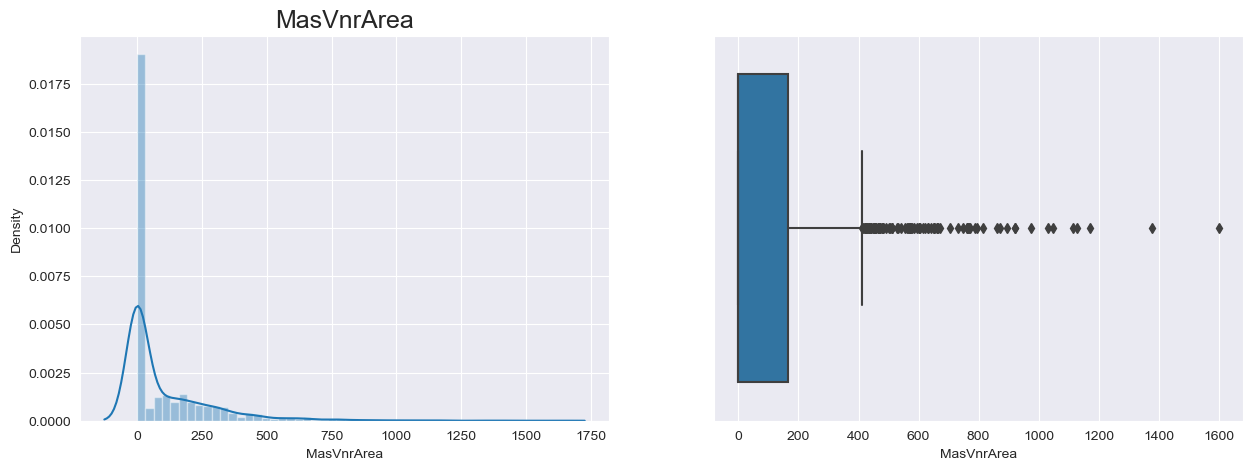

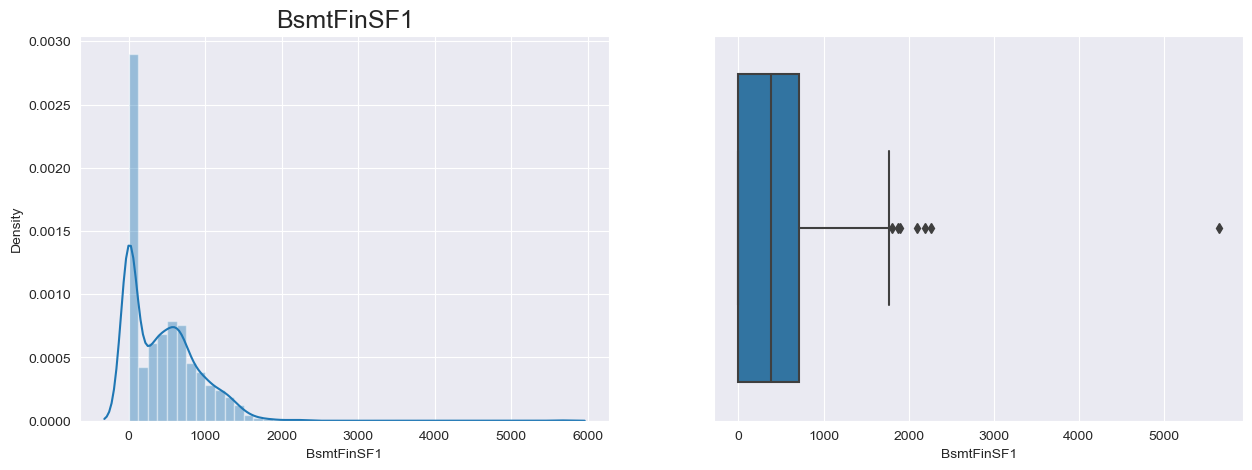

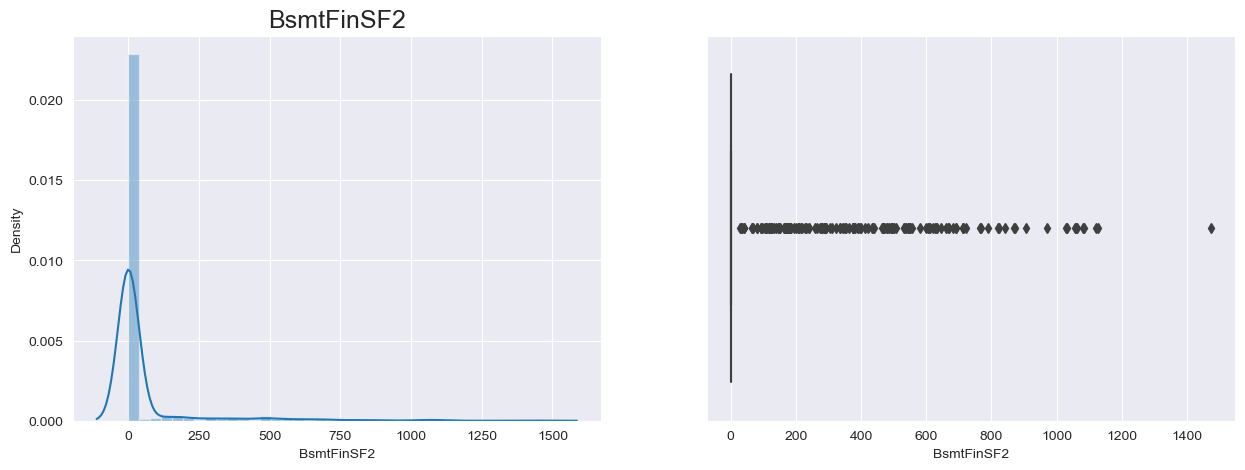

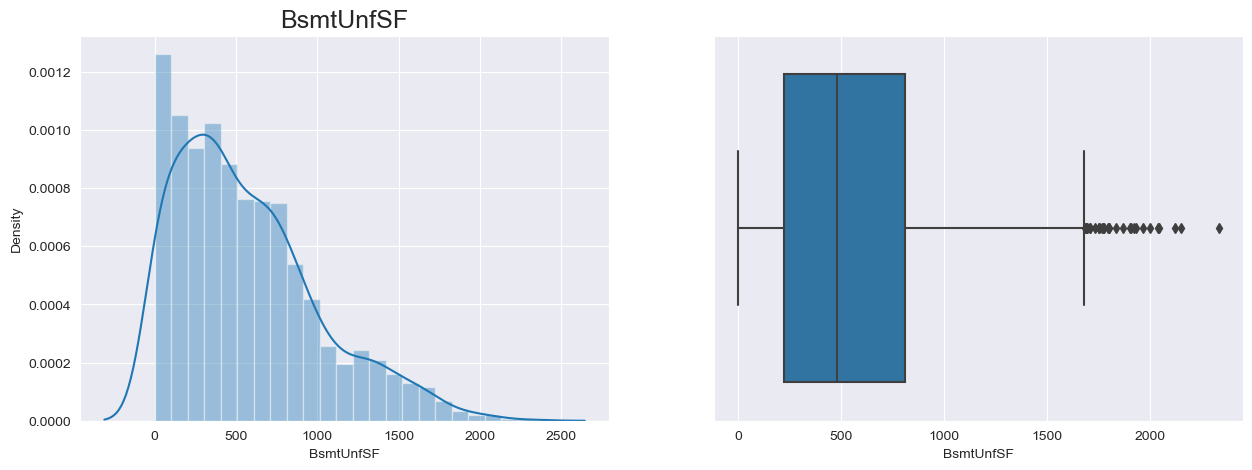

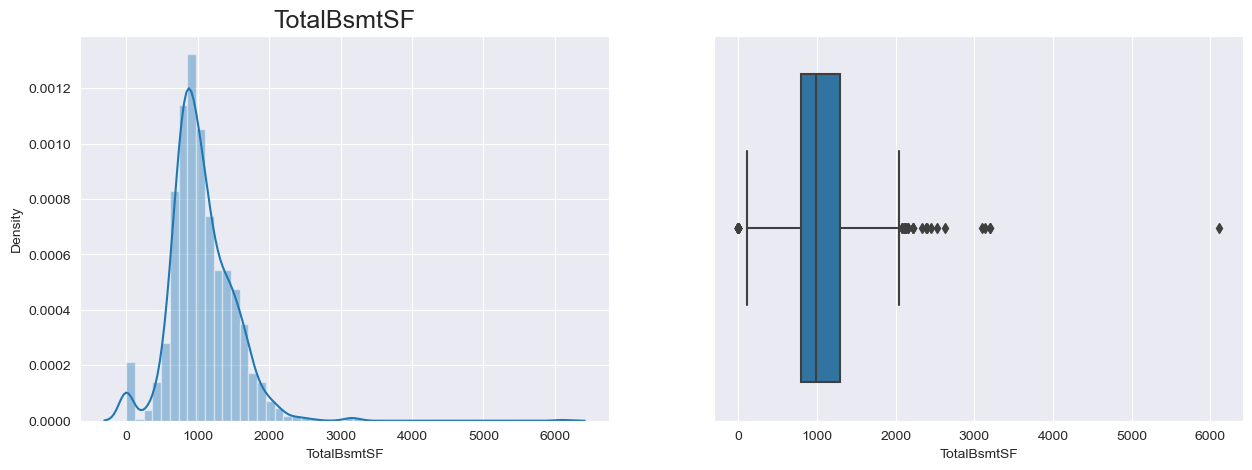

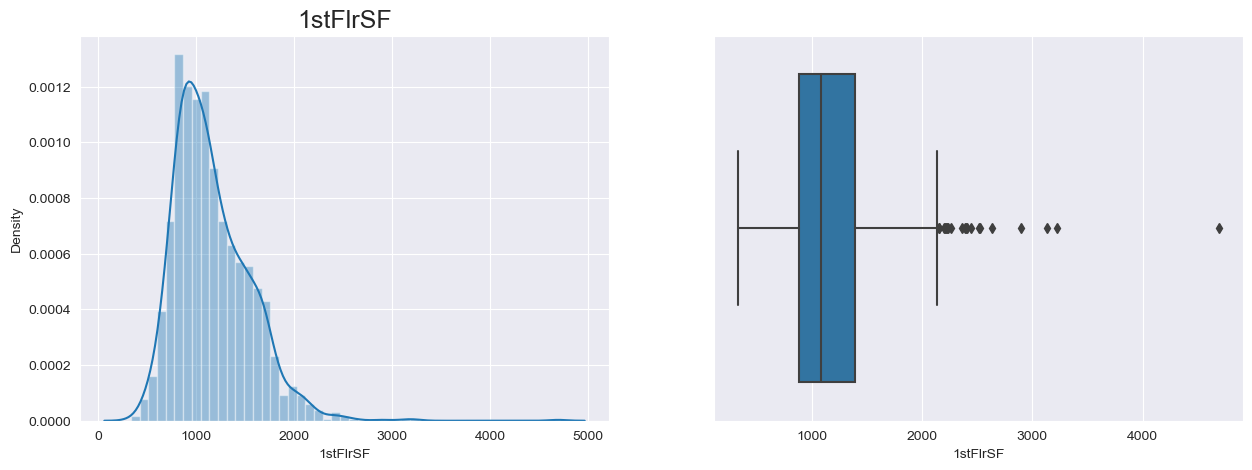

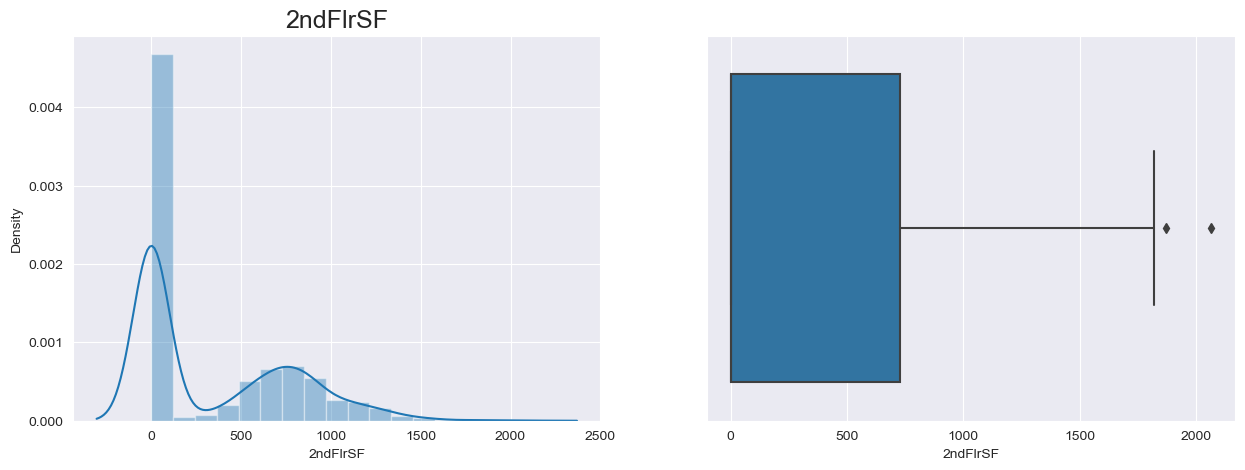

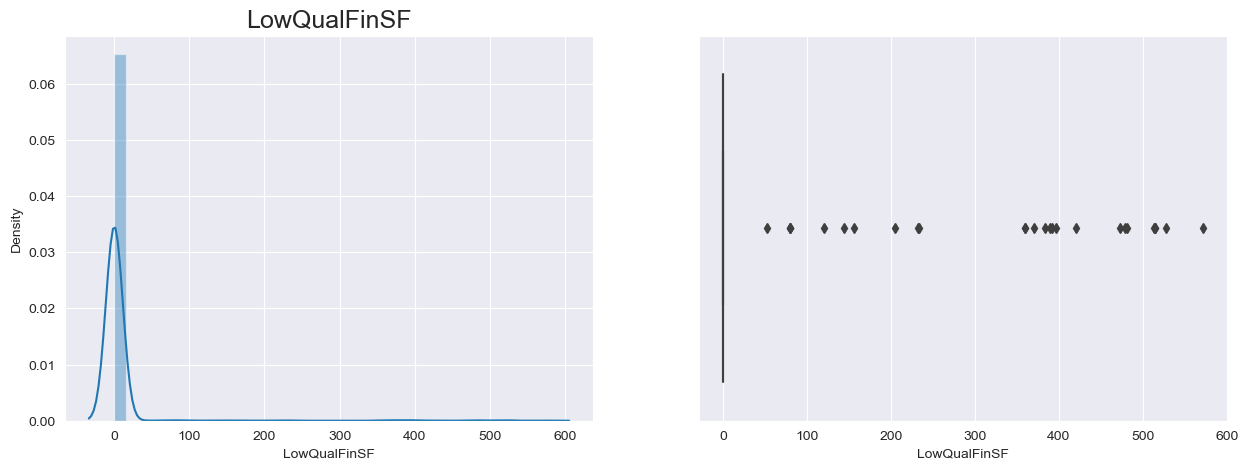

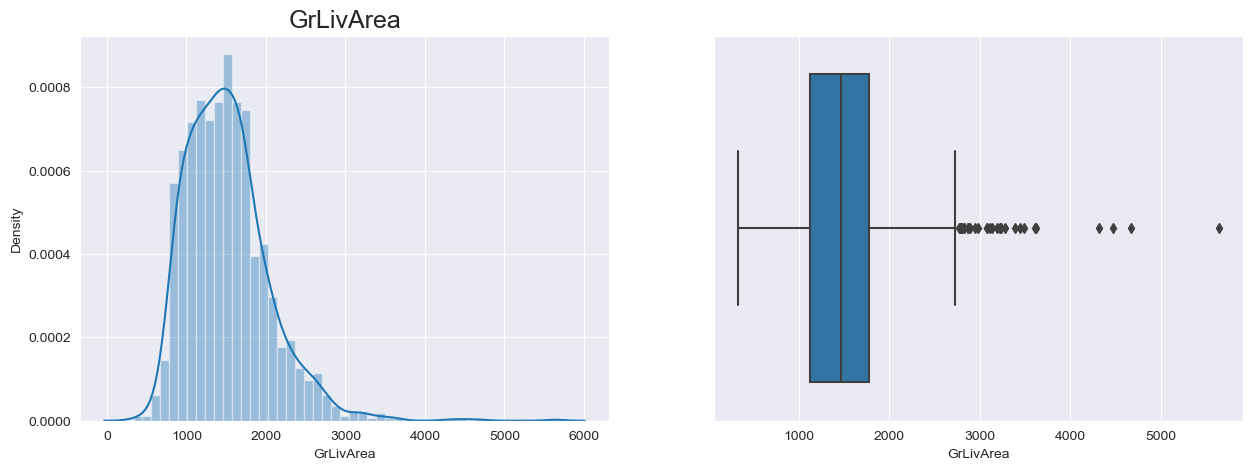

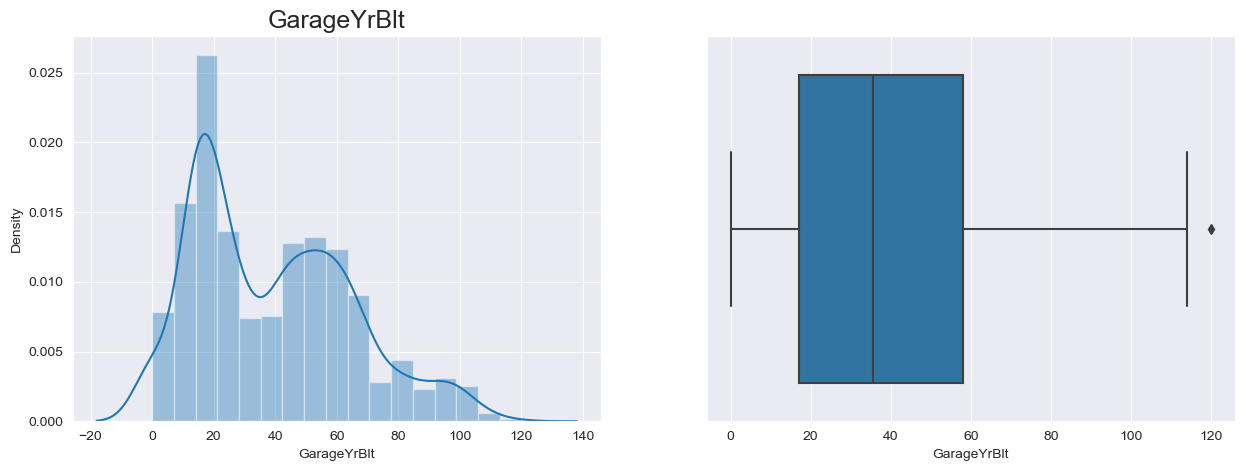

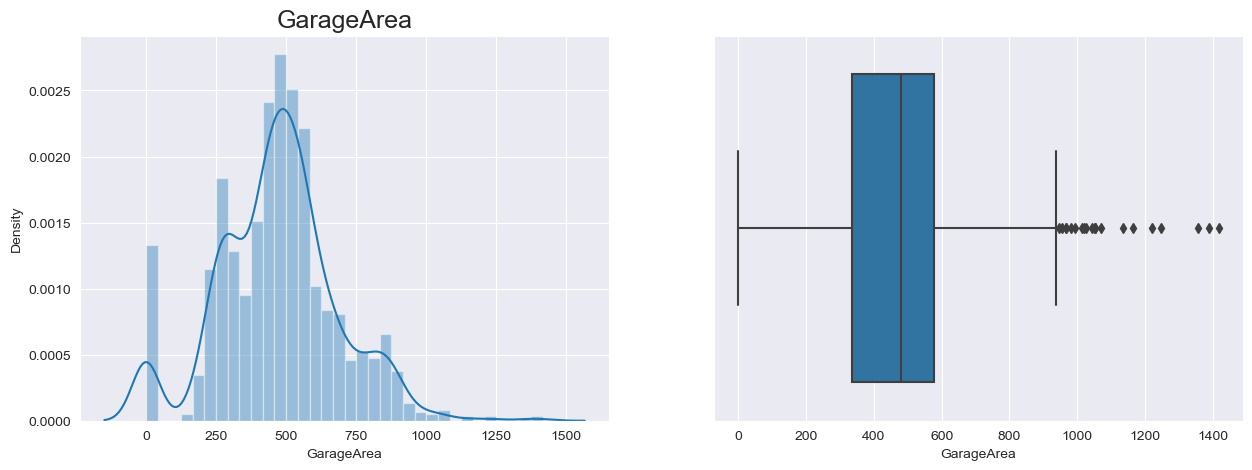

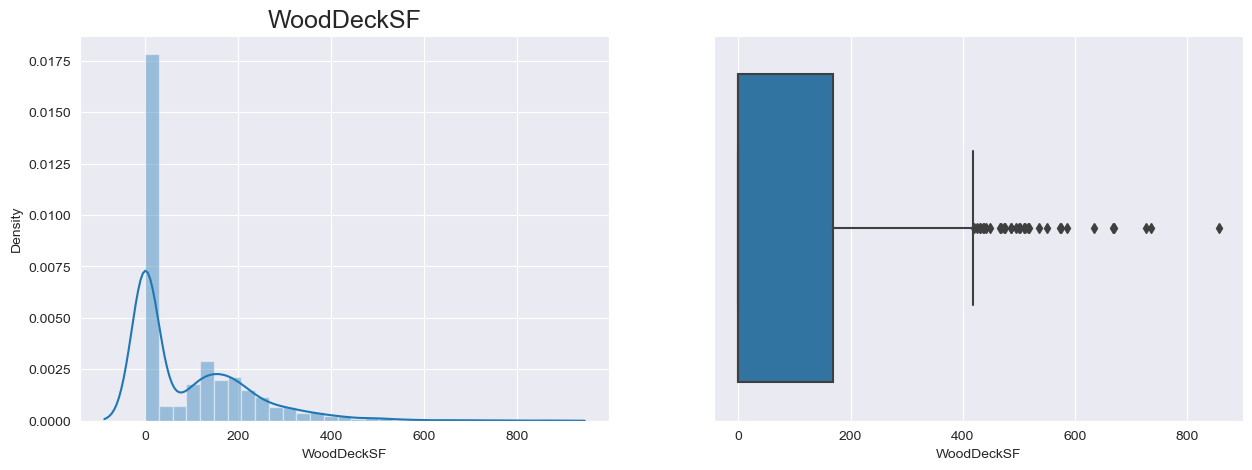

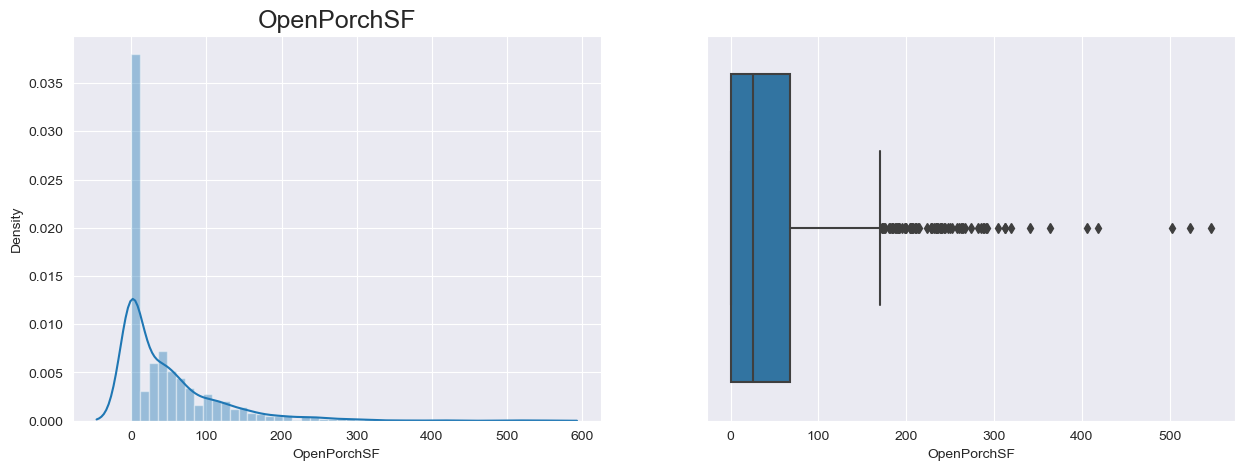

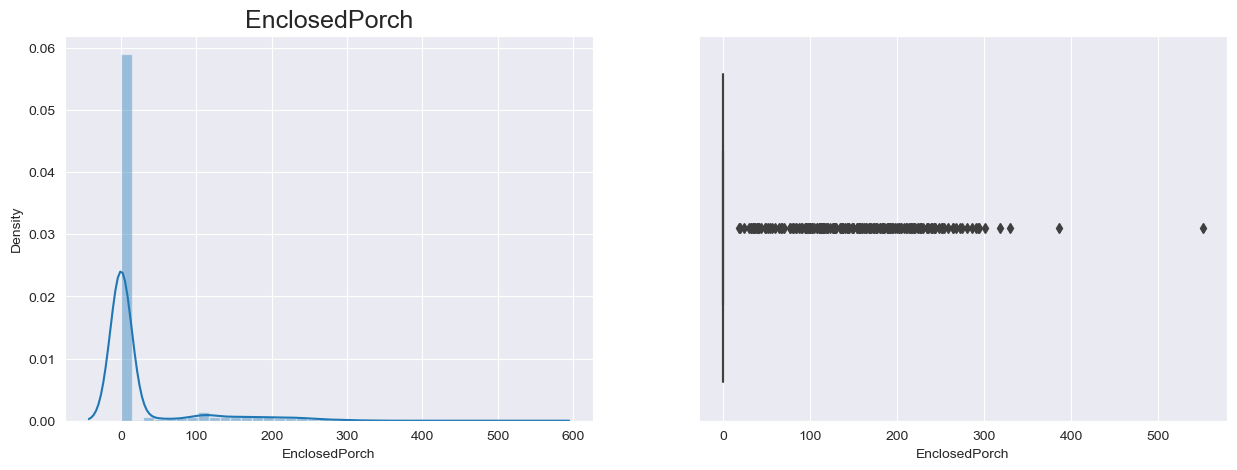

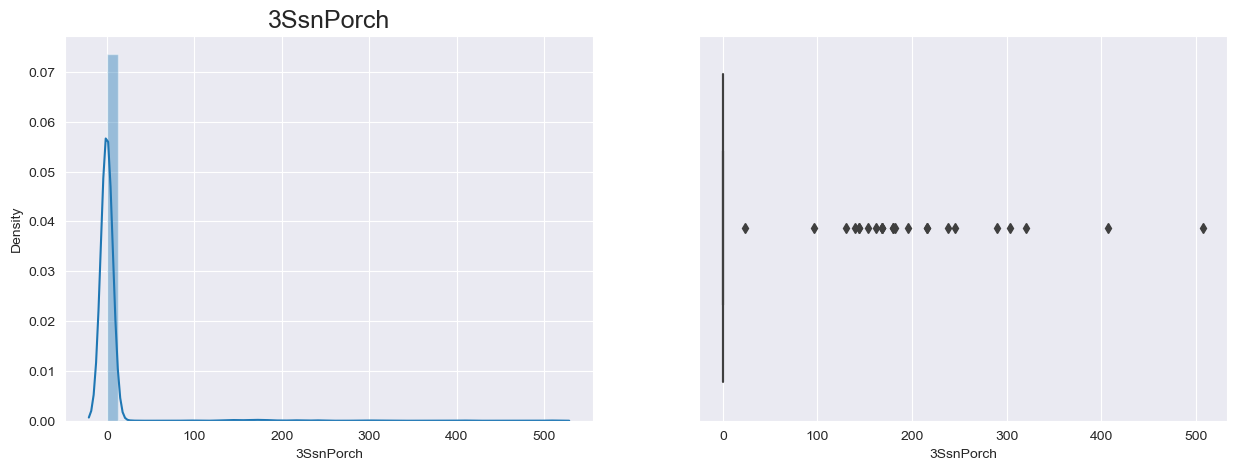

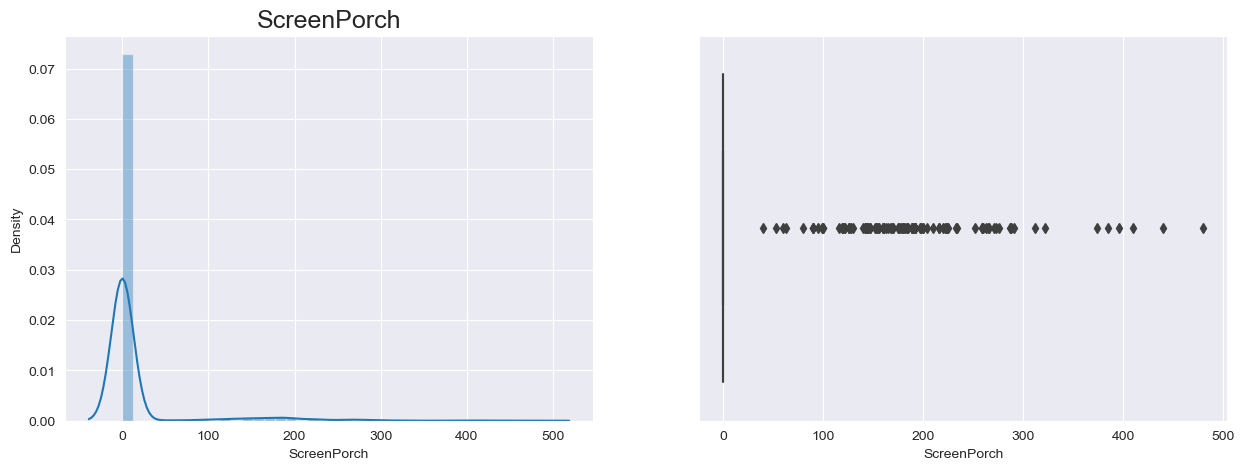

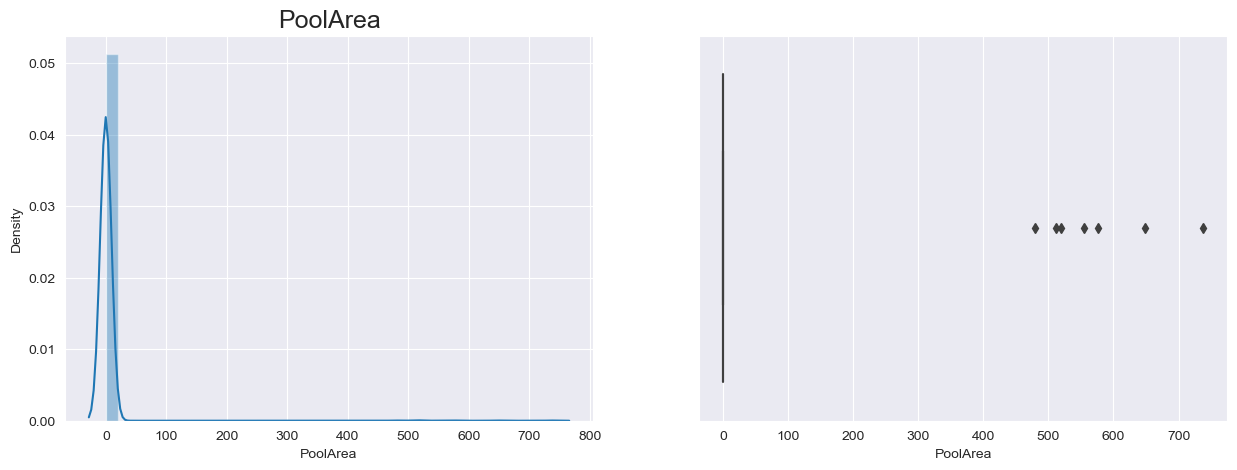

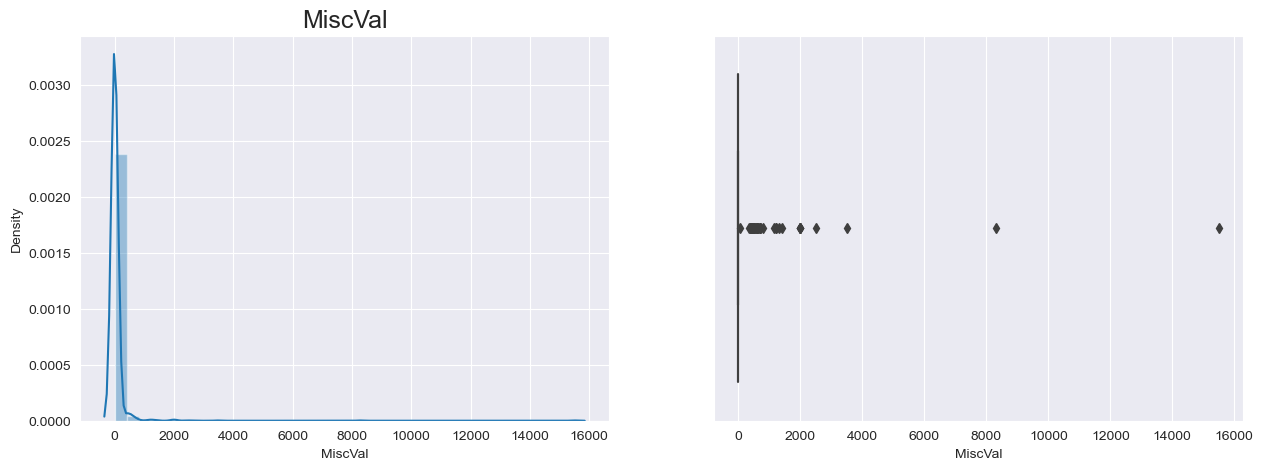

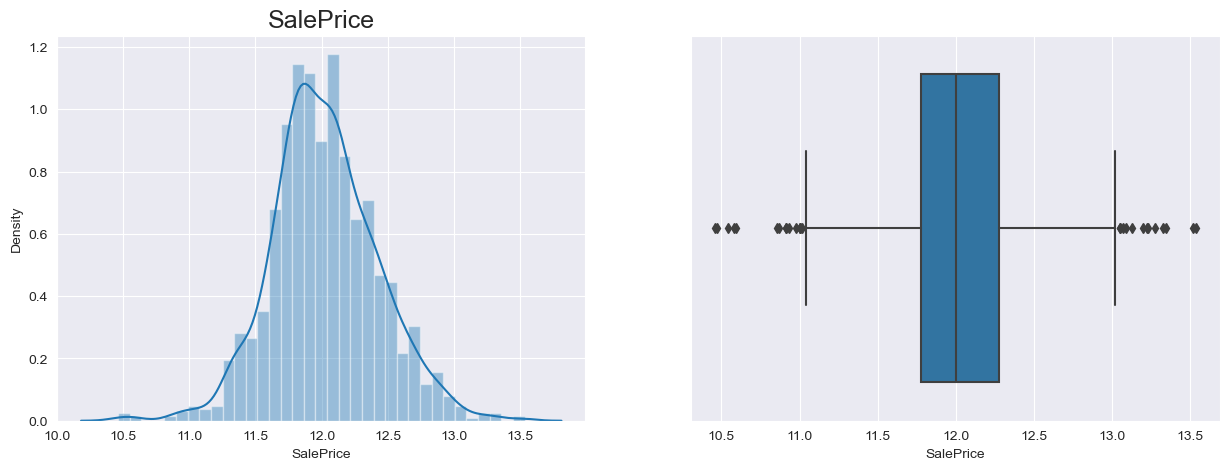

In [134]:
## View the distribution of all numeric variables using histograms and boxplots

for col in house_numeric.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(house_numeric[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(house_numeric[col])
    plt.show()  

In [135]:
# correlation matrix
cor = house_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.00,0.10,0.11,0.08,-0.01,0.16,0.24,0.25,0.04,0.05,...,-0.03,0.20,-0.02,0.07,0.03,0.02,0.02,0.11,-0.06,0.18
LotArea,0.10,1.00,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,...,0.05,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.26
MasVnrArea,0.11,0.10,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,...,-0.18,0.37,0.16,0.12,-0.11,0.02,0.06,0.01,-0.03,0.43
BsmtFinSF1,0.08,0.21,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,...,-0.10,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,0.37
BsmtFinSF2,-0.01,0.11,-0.07,-0.05,1.00,-0.21,0.10,0.10,-0.10,0.01,...,0.10,-0.02,0.07,0.00,0.04,-0.03,0.09,0.04,0.00,0.00
BsmtUnfSF,0.16,-0.00,0.11,-0.50,-0.21,1.00,0.42,0.32,0.00,0.03,...,-0.16,0.18,-0.01,0.13,-0.00,0.02,-0.01,-0.04,-0.02,0.22
TotalBsmtSF,0.24,0.26,0.36,0.52,0.10,0.42,1.00,0.82,-0.17,-0.03,...,-0.23,0.49,0.23,0.25,-0.10,0.04,0.08,0.13,-0.02,0.61
1stFlrSF,0.25,0.30,0.34,0.45,0.10,0.32,0.82,1.00,-0.20,-0.01,...,-0.15,0.49,0.24,0.21,-0.07,0.06,0.09,0.13,-0.02,0.60
2ndFlrSF,0.04,0.05,0.17,-0.14,-0.10,0.00,-0.17,-0.20,1.00,0.06,...,-0.04,0.14,0.09,0.21,0.06,-0.02,0.04,0.08,0.02,0.32
LowQualFinSF,0.05,0.00,-0.07,-0.06,0.01,0.03,-0.03,-0.01,0.06,1.00,...,-0.03,-0.07,-0.03,0.02,0.06,-0.00,0.03,0.06,-0.00,-0.04


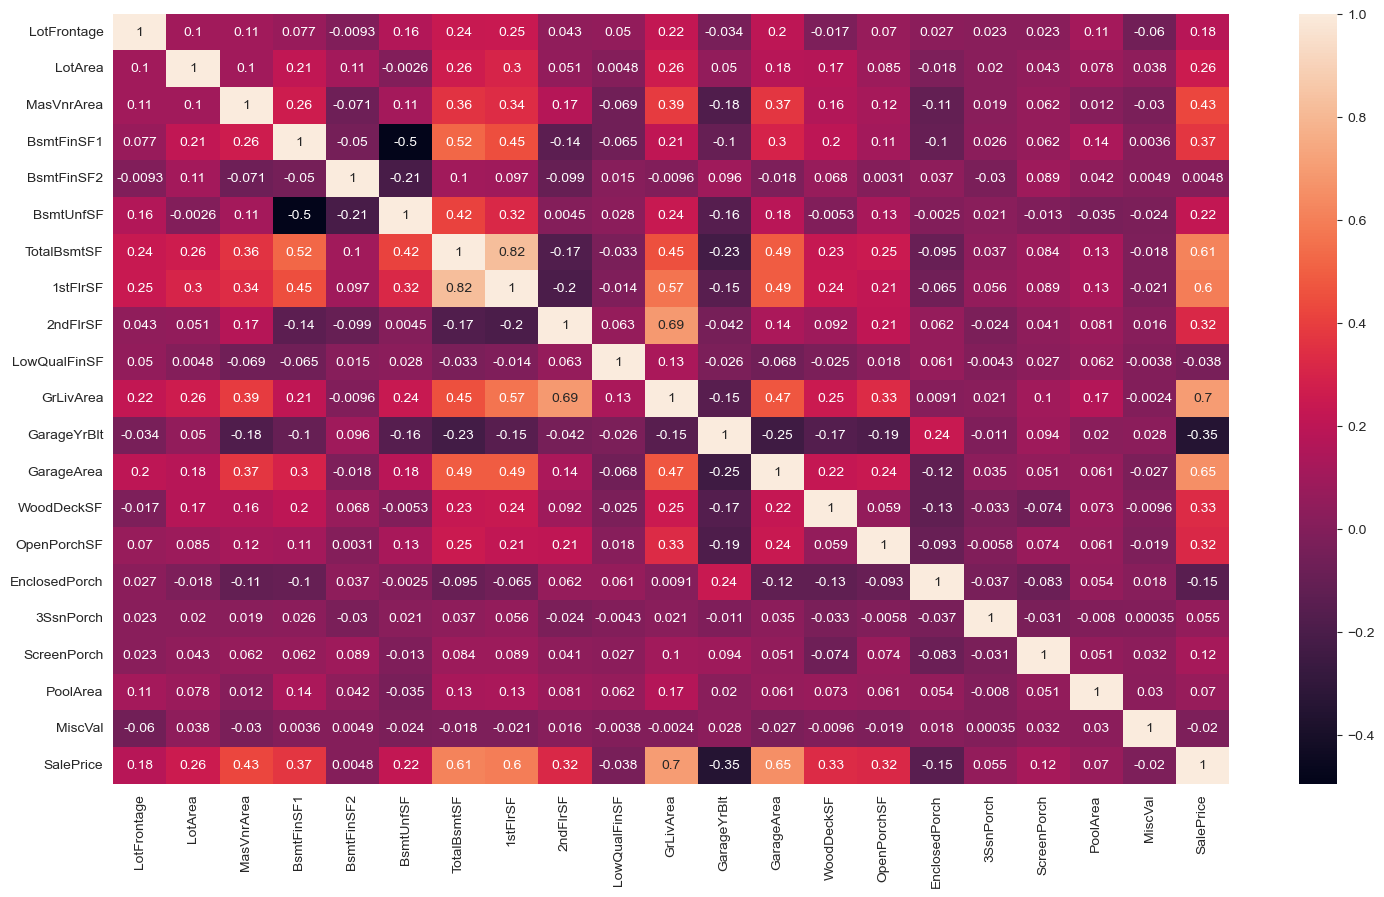

In [136]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

### Removing outliers from the data

In [137]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in house_numeric.columns:
    house_numeric[col][house_numeric[col] <= house_numeric[col].quantile(0.05)] = house_numeric[col].quantile(0.05)
    house_numeric[col][house_numeric[col] >= house_numeric[col].quantile(0.95)] = house_numeric[col].quantile(0.95)


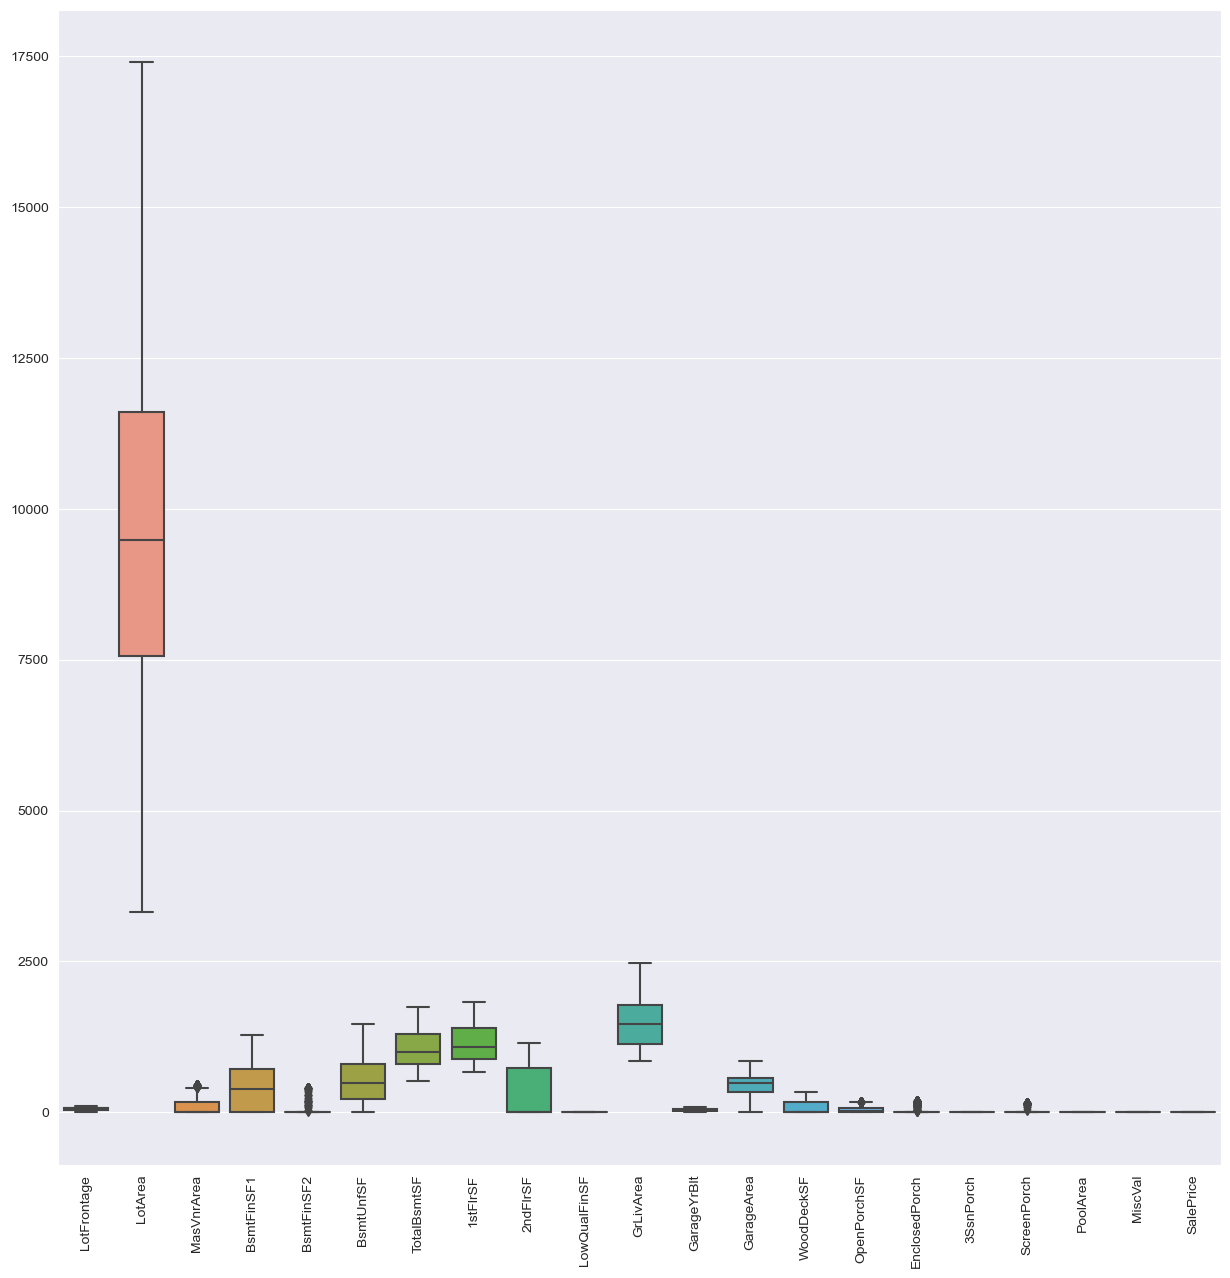

In [138]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=house_numeric);

### Seperating categorical features from DF

In [139]:
## Extract categorical columns
house_cat = df_train.select_dtypes(include='object')
house_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [140]:
house_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   object
 15  OverallCond    1460 non-null   object
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

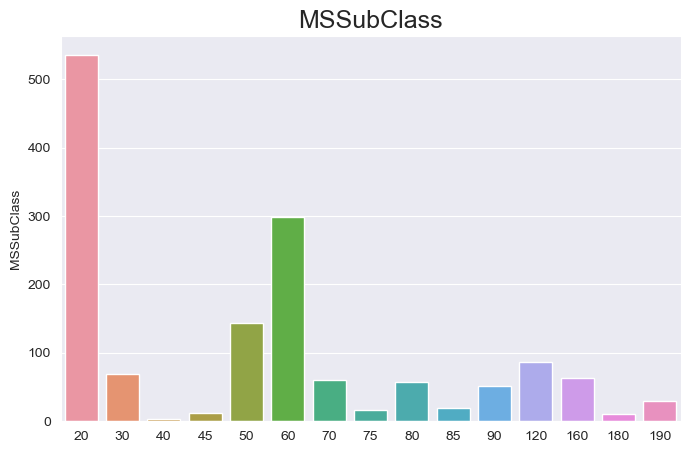

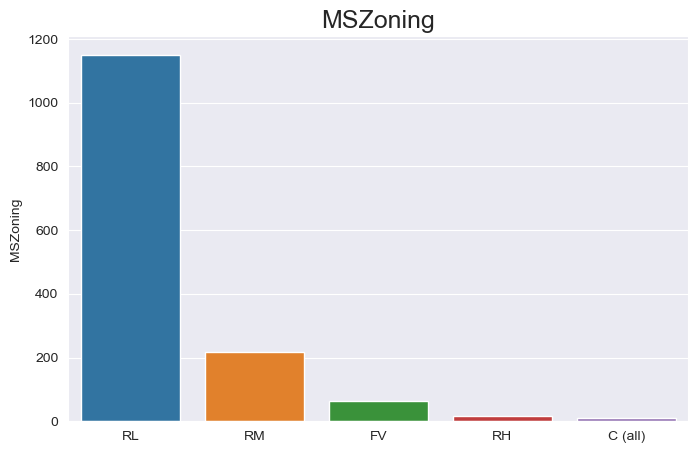

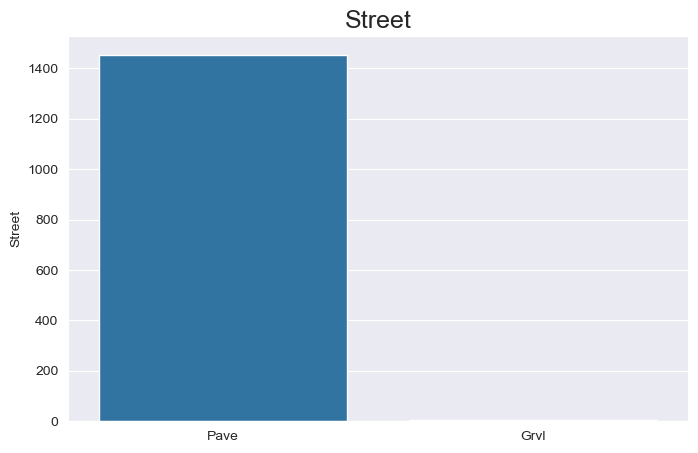

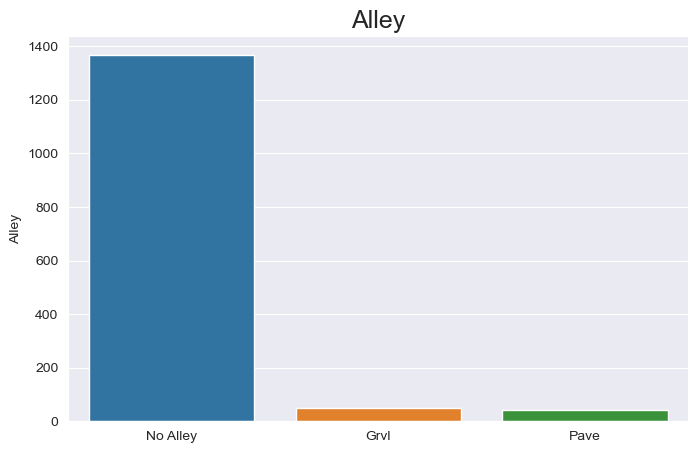

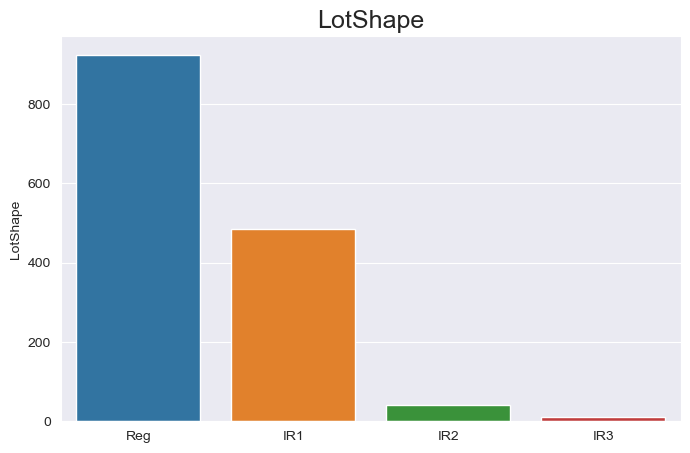

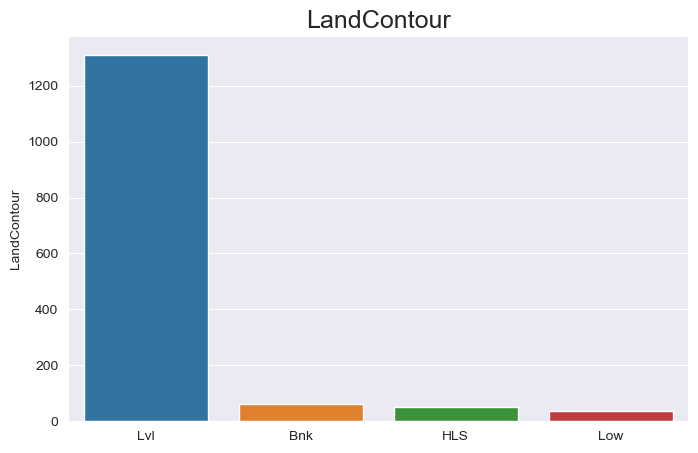

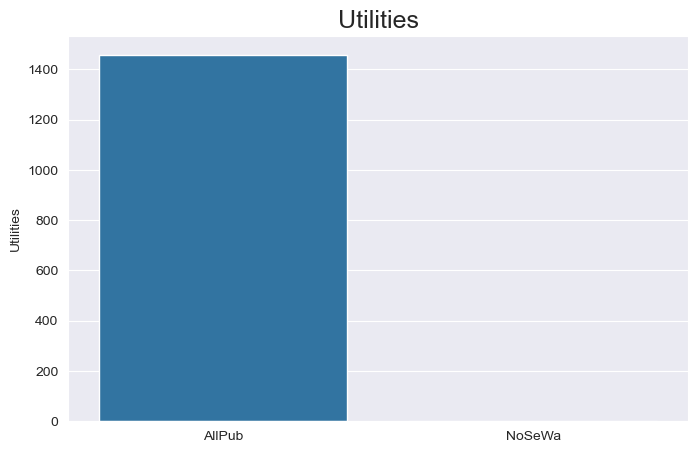

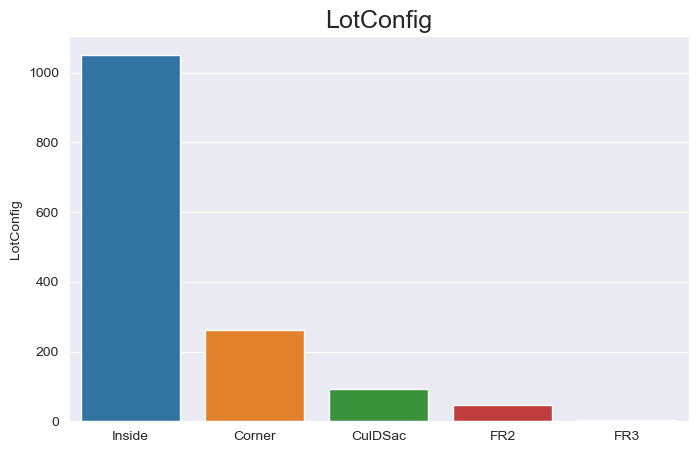

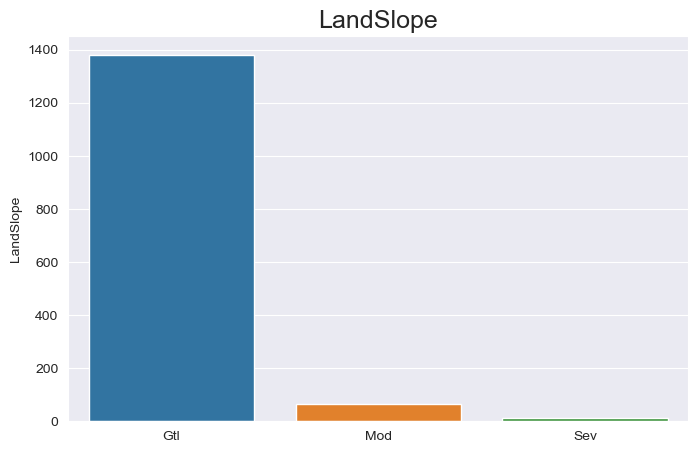

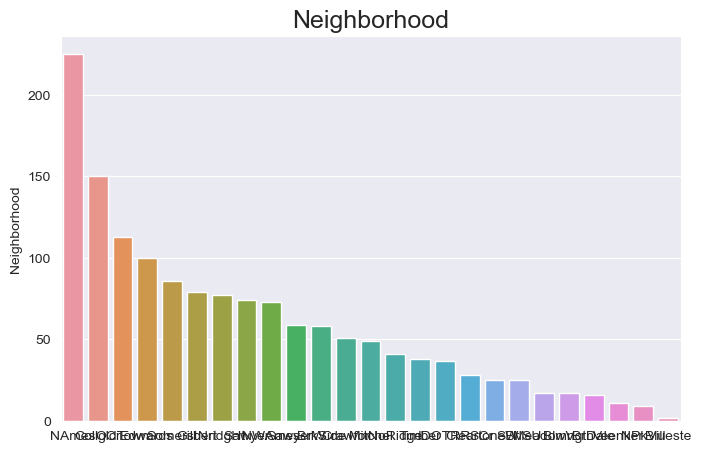

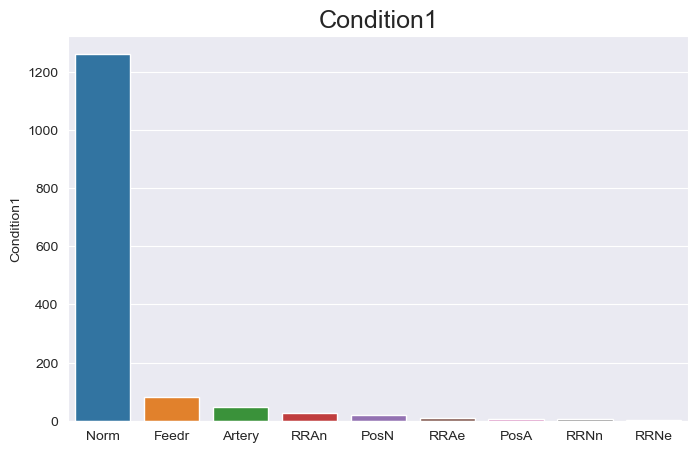

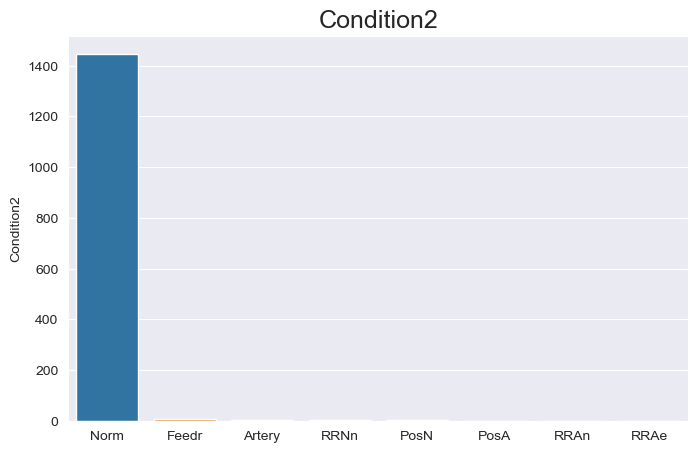

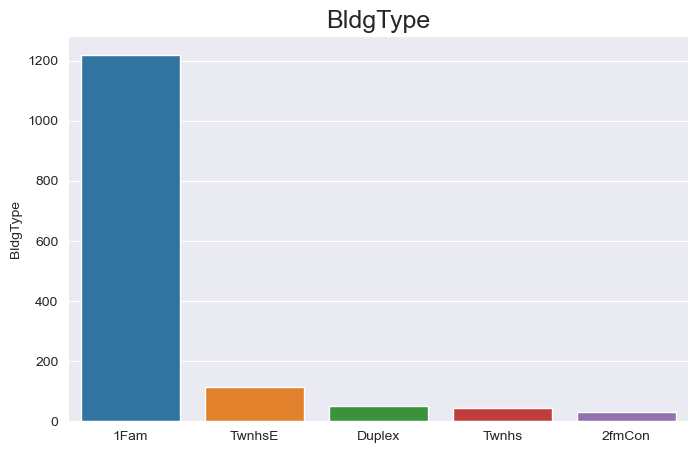

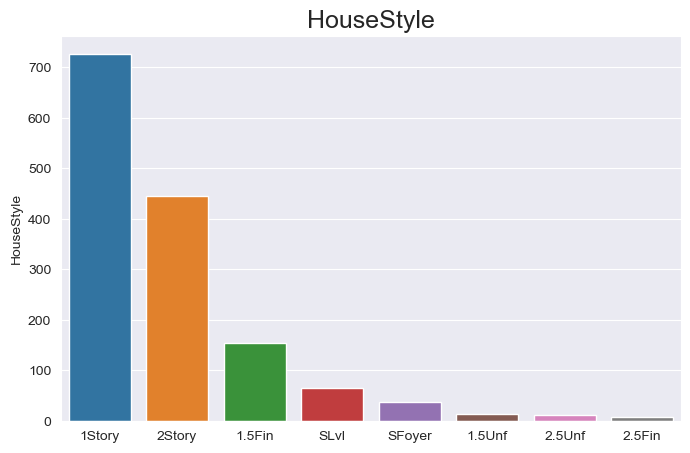

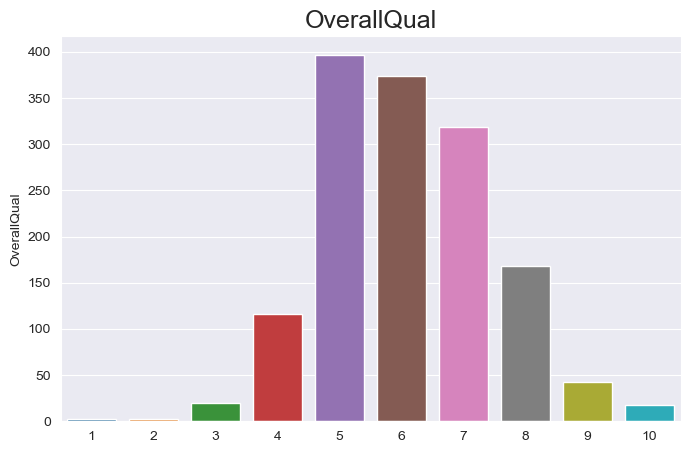

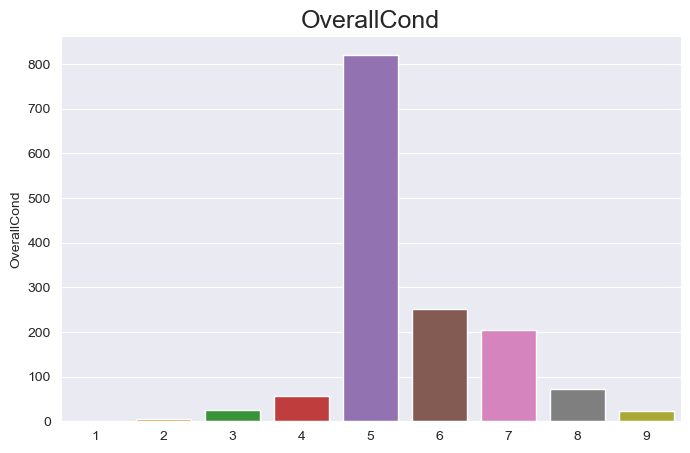

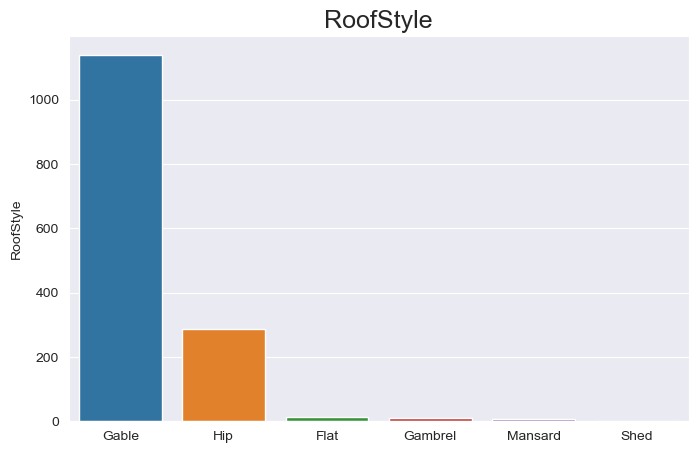

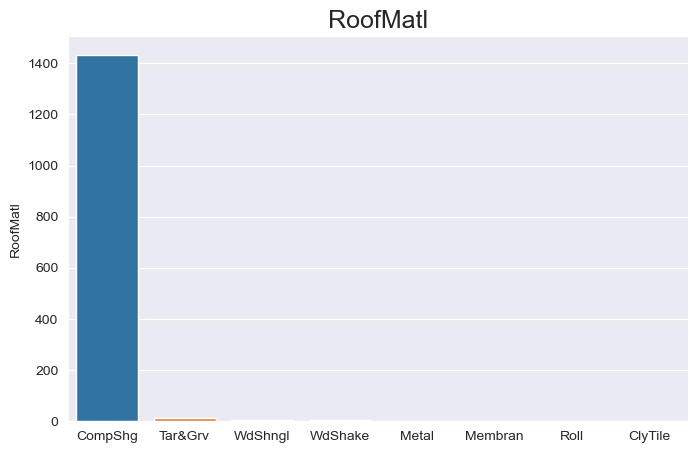

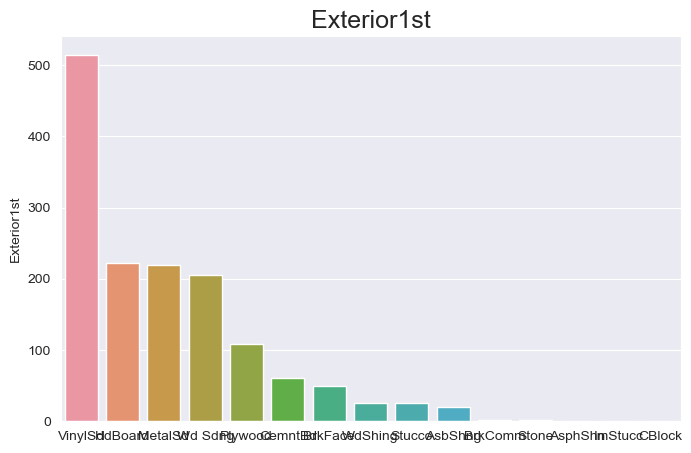

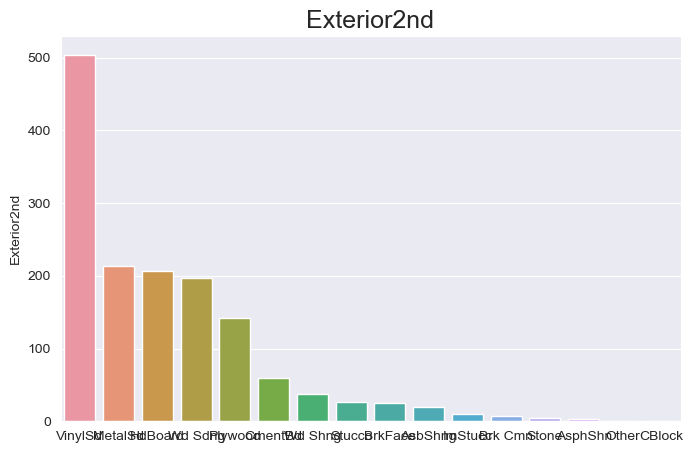

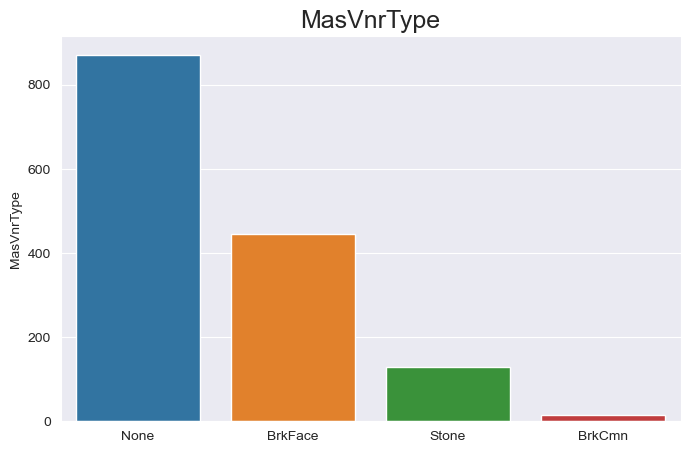

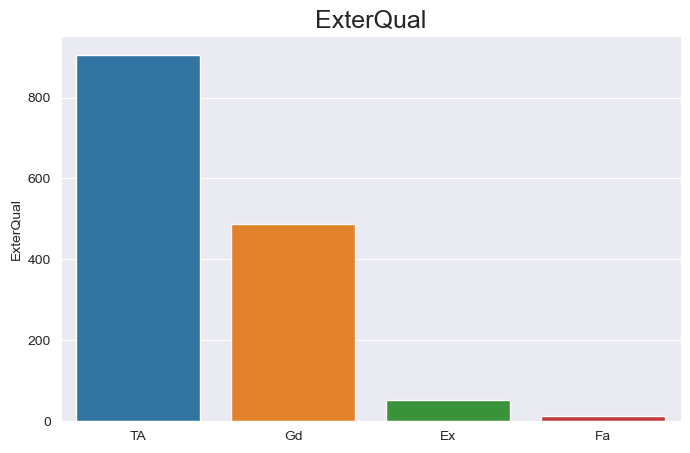

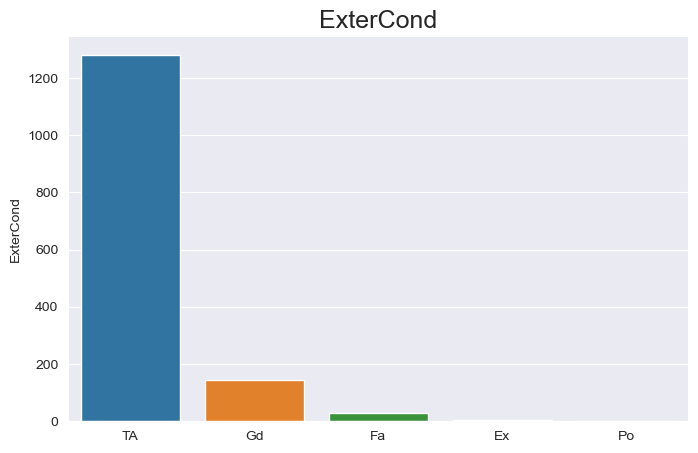

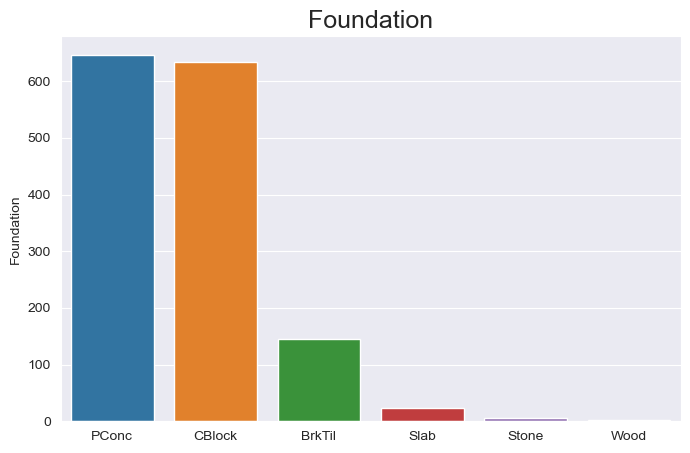

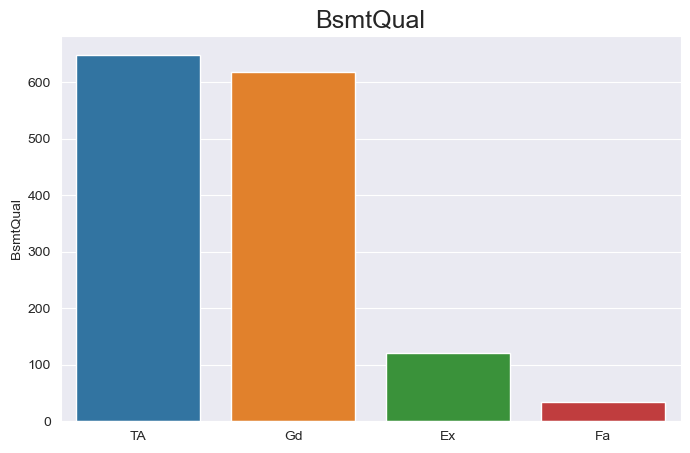

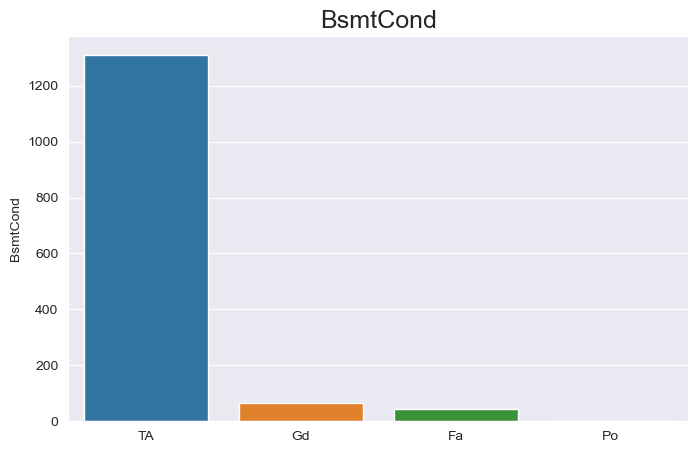

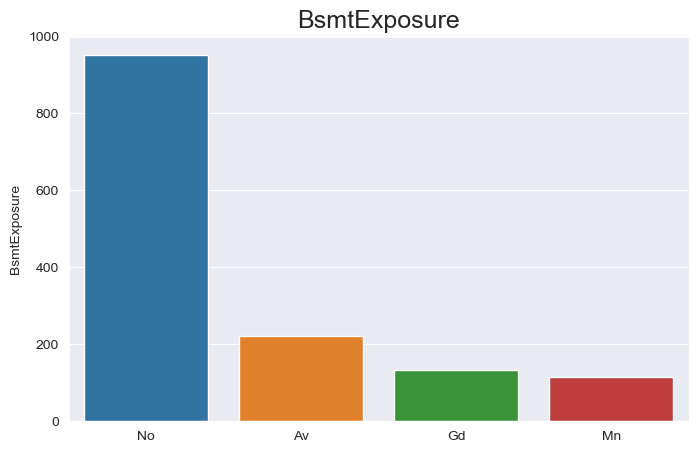

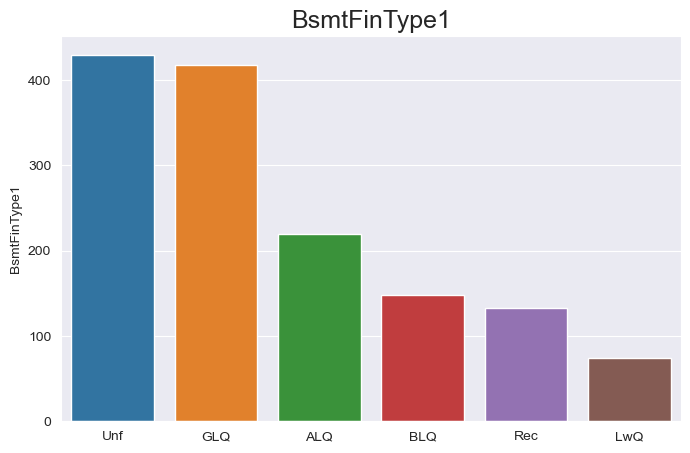

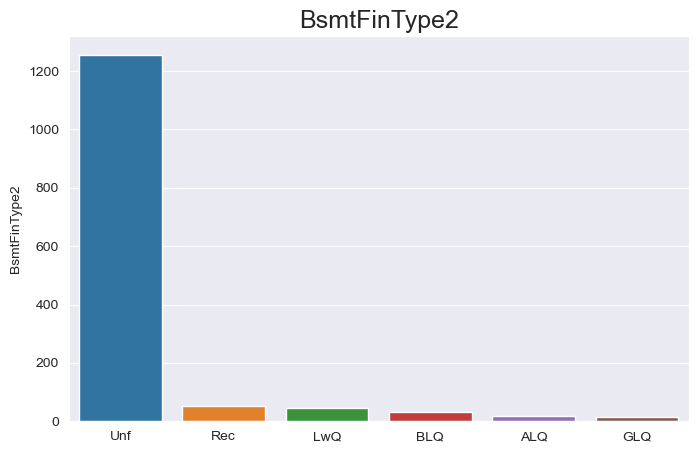

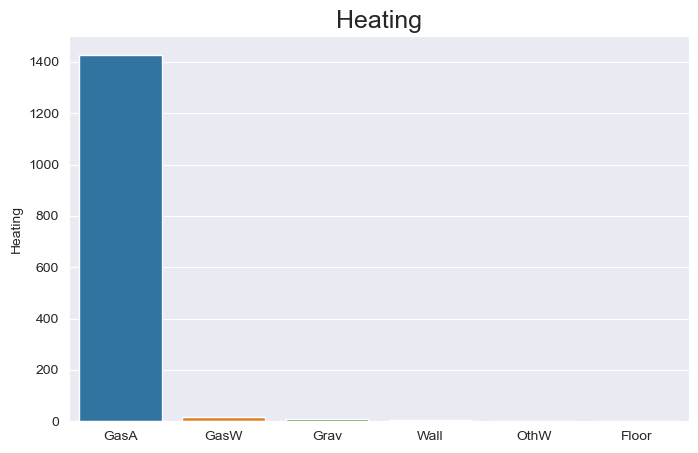

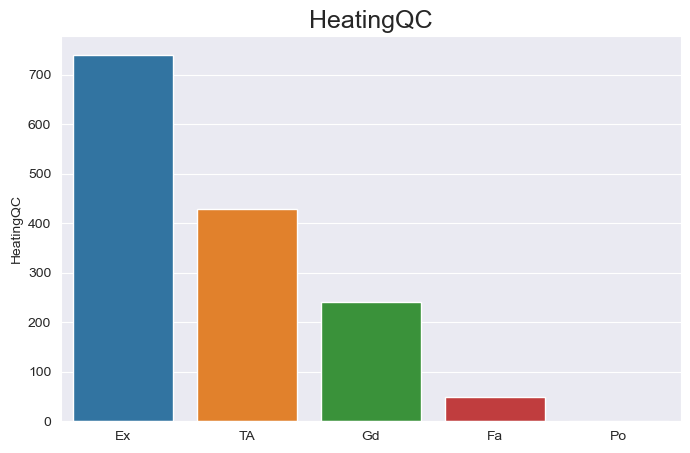

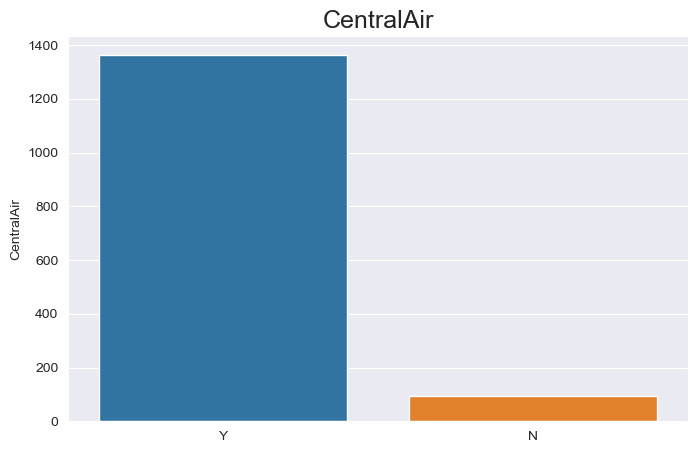

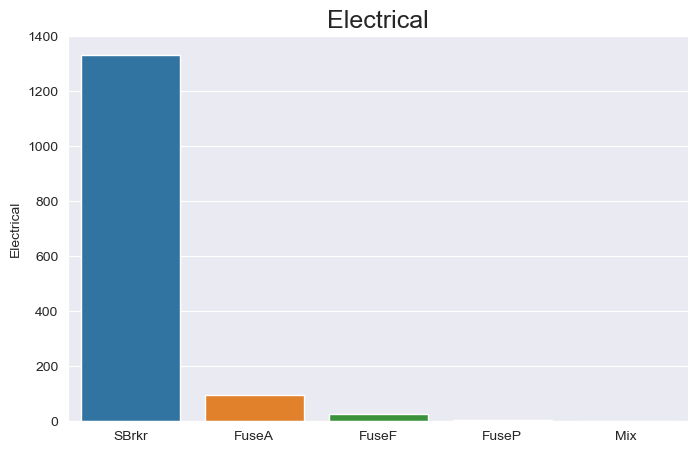

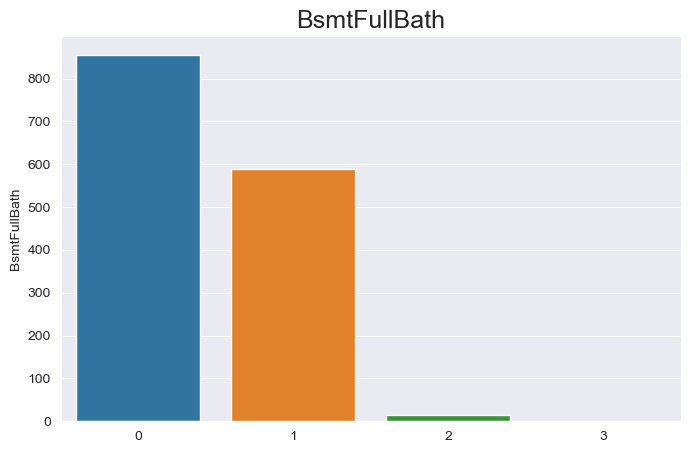

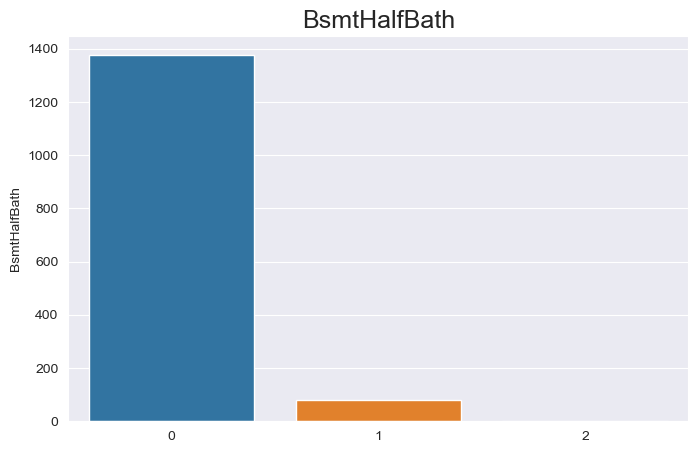

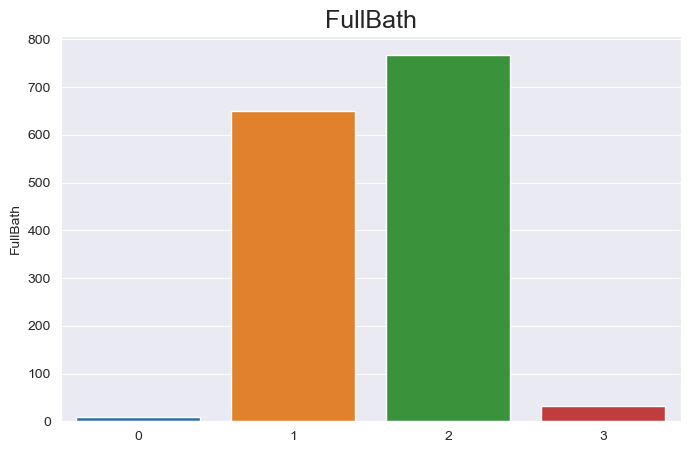

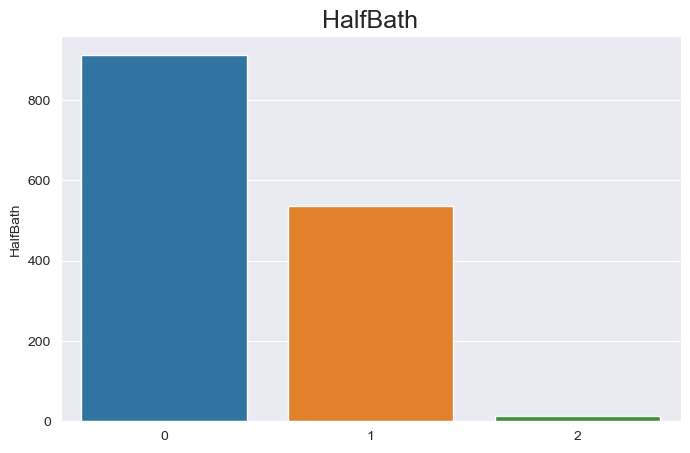

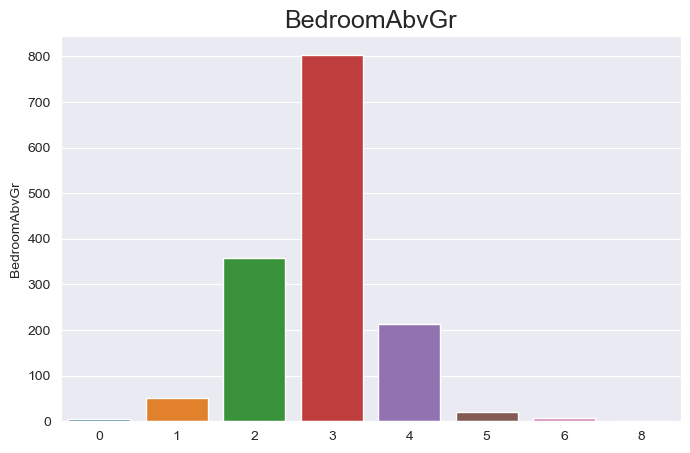

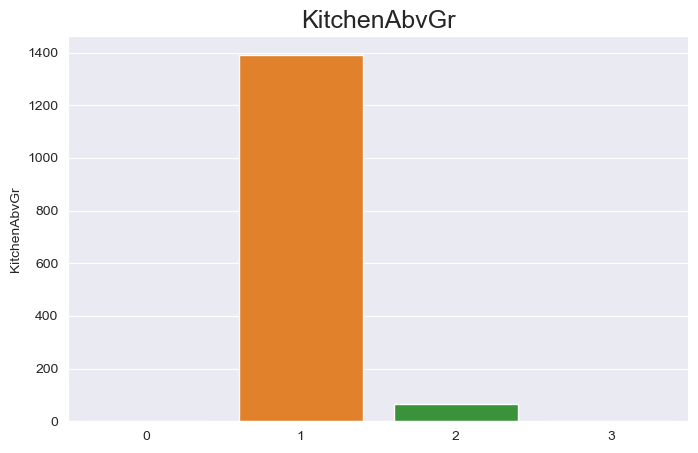

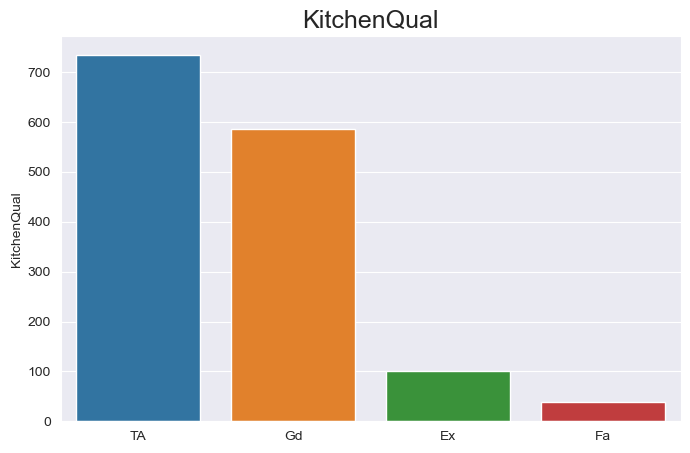

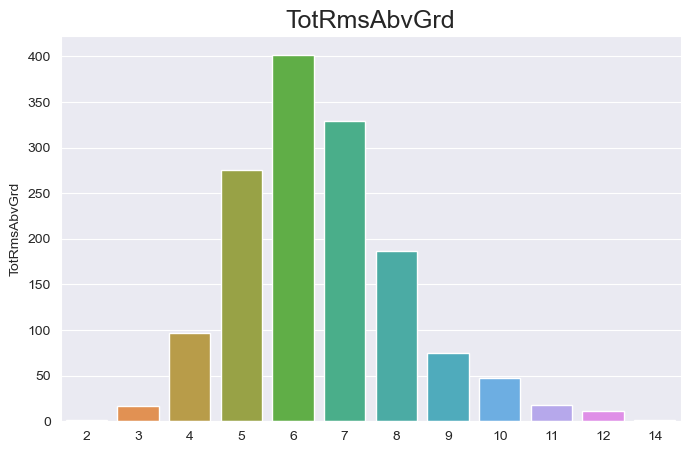

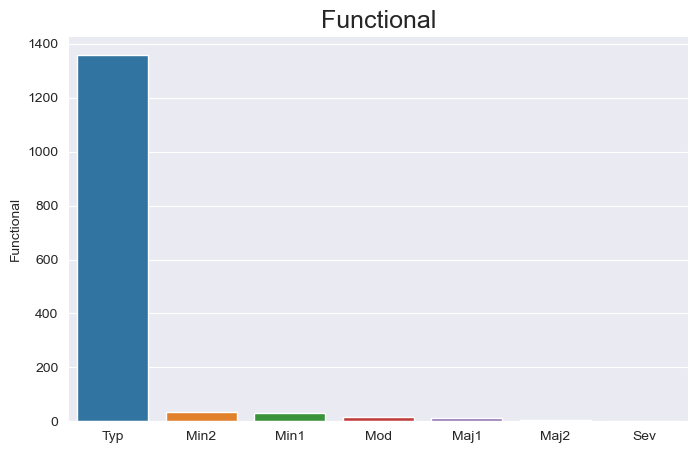

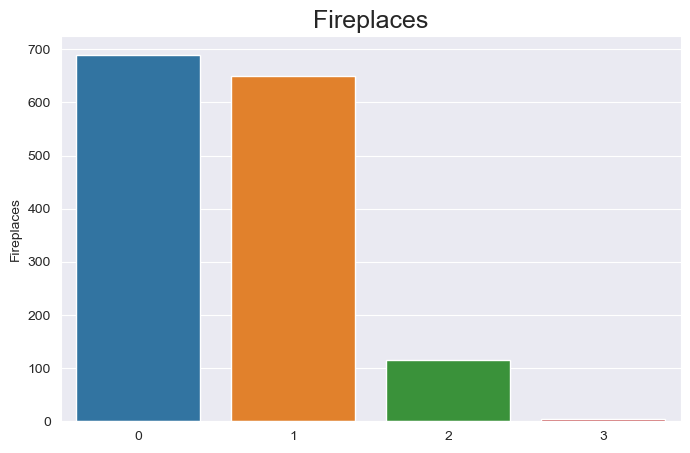

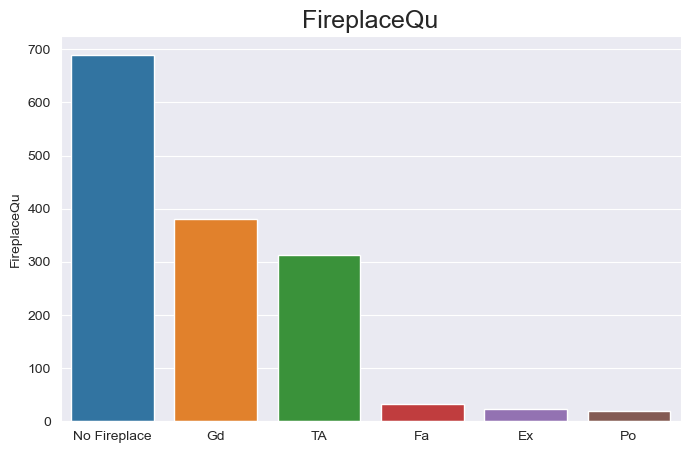

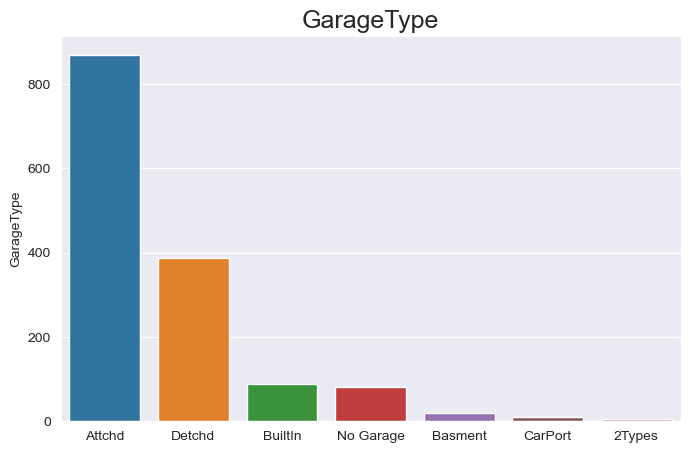

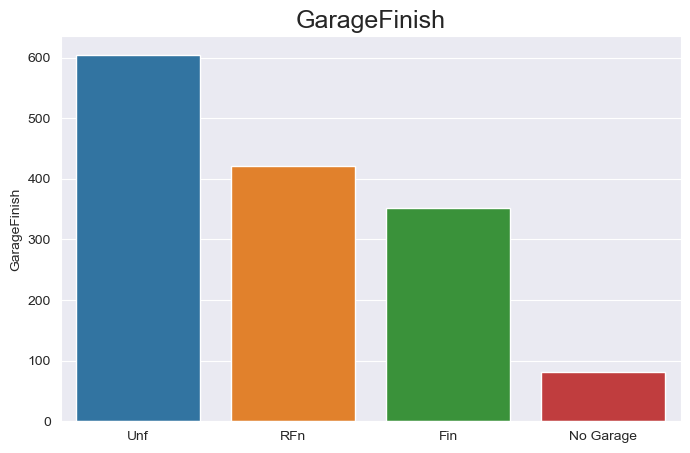

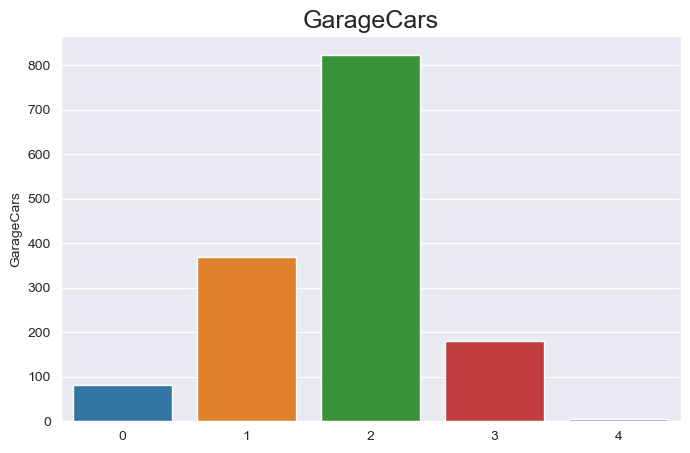

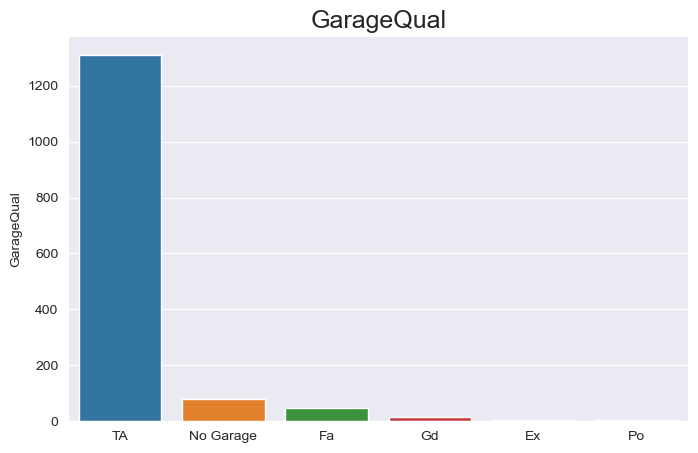

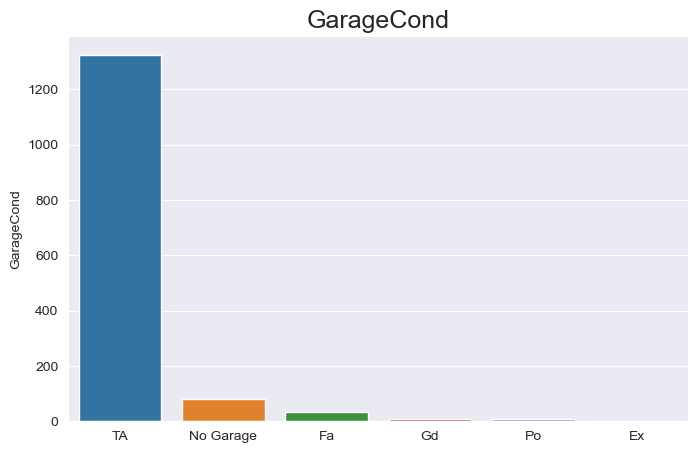

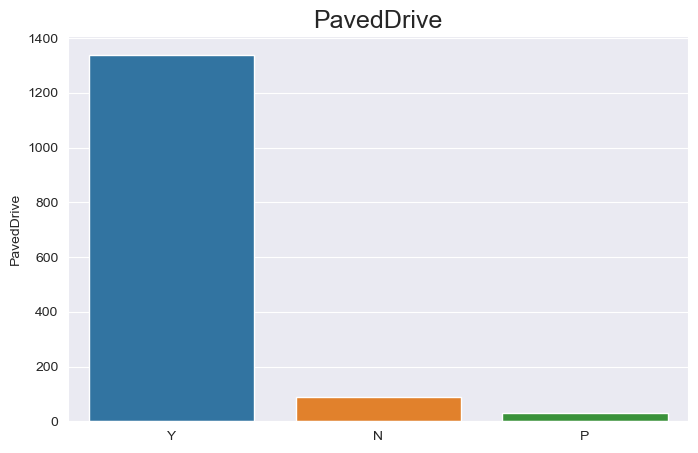

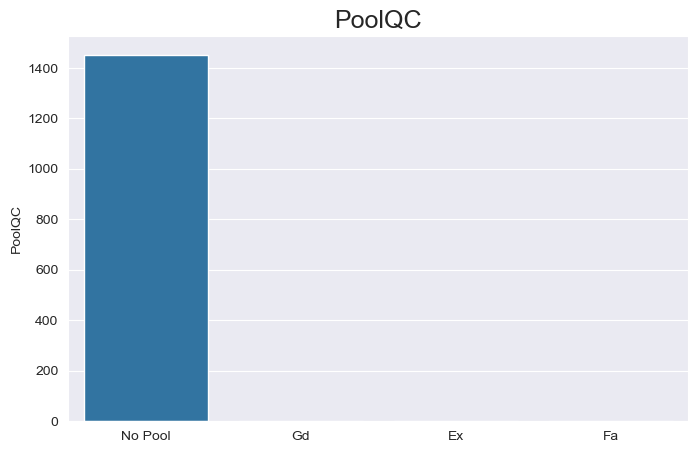

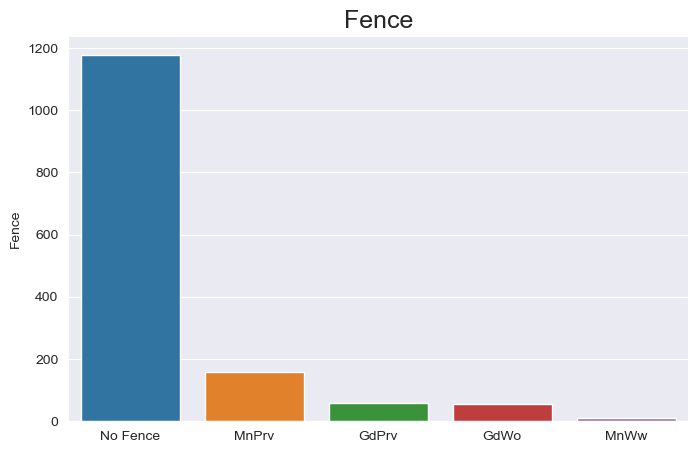

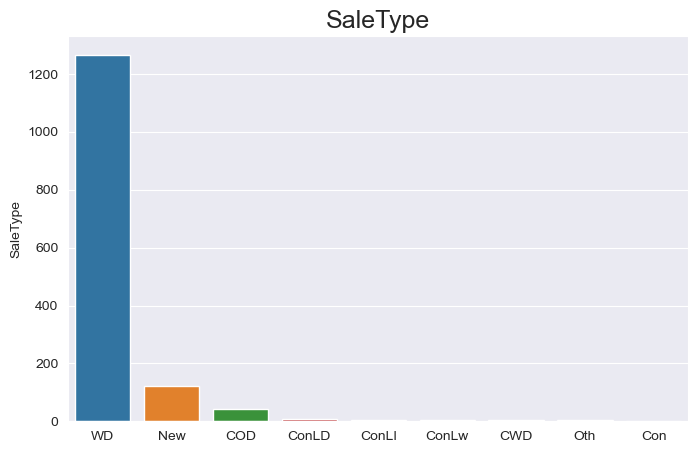

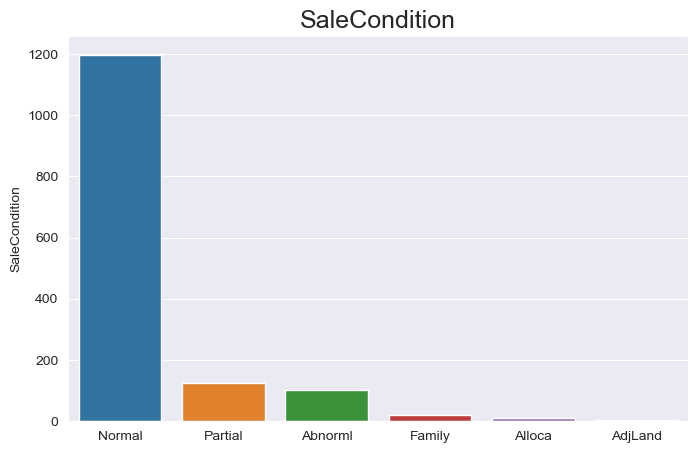

In [141]:
## Visualizing the levels of categorical columns using bar plots
for col in house_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(house_cat[col].value_counts().index, house_cat[col].value_counts())
    plt.show()

#### data preprocessing/imputation for categorical features

In [142]:
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
house_cat[varlist1] = house_cat[varlist1].apply(binary_map)

In [143]:

# List of variables to map

varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
house_cat[varlist2] = house_cat[varlist2].apply(binary_map)

In [144]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
house_cat[varlist3] = house_cat[varlist3].apply(binary_map)

#### In order to convert categorical to numeric data for te furture processing of data

In [145]:
# convert into dummies
house_dummies = pd.get_dummies(house_cat, drop_first=True)
house_dummies.head()

,Street,Utilities,CentralAir,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


### combining the numeric and categorical data for final modelling

In [146]:
# concat dummy variables with X
final = pd.concat([house_numeric, house_dummies], axis=1)

In [147]:
final.shape

(1460, 304)

In [148]:
X = final.head(1253)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1) # take out the target variable

In [149]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [150]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1002, 303)
(1002,)


In [151]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)


(251, 303)
(251,)


In [152]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'Street',
 'Utilities',
 'CentralAir']

In [153]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [154]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [155]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [156]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 8.0}

In [157]:
## View the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.02258935, 0.02546349, 0.02021298, 0.01982493, 0.02019849,
        0.01990147, 0.01974869, 0.02005301, 0.01947732, 0.0226213 ,
        0.02512465, 0.04212613, 0.05210934, 0.04111557, 0.05027094,
        0.02876282, 0.02640324, 0.02308416, 0.01425252, 0.01665497,
        0.01972446, 0.02365899, 0.02092919, 0.02052317, 0.02111907,
        0.0242981 , 0.0356184 , 0.02552409]),
 'std_fit_time': array([0.00308967, 0.00667366, 0.00177998, 0.00105129, 0.00059751,
        0.00071274, 0.00114885, 0.00083857, 0.00413443, 0.00705129,
        0.0036989 , 0.02137918, 0.02082173, 0.02228684, 0.02727797,
        0.00388963, 0.00466394, 0.00189591, 0.00431028, 0.00443782,
        0.00140588, 0.00151289, 0.00146822, 0.00207042, 0.00230706,
        0.00270528, 0.01318298, 0.00371193]),
 'mean_score_time': array([0.00662923, 0.00596266, 0.00589728, 0.00592937, 0.00625854,
        0.00627322, 0.00600033, 0.00628858, 0.00609565, 0.00567517,
        0.00999966, 0.0074142 , 0.010827

In [158]:
# Create a ridge regreesion instance with optimum value alpha=8
ridge = Ridge(alpha=8)

In [159]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=8)

In [160]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 2.44265524e-04,  1.89065040e-03,  1.67261935e-04,  1.63276873e-03,
        1.12542095e-03, -8.82455980e-04,  4.63158819e-03,  1.82063078e-03,
        4.45372692e-03,  0.00000000e+00,  5.49637472e-03, -1.23889563e-03,
        1.96439767e-03,  5.34781321e-04,  5.85153991e-04,  2.85009956e-04,
        0.00000000e+00,  8.37531873e-04,  0.00000000e+00,  0.00000000e+00,
        4.84563454e-04,  4.48284453e-04,  1.35005533e-03, -5.19214153e-03,
        3.52464469e-04,  2.81190396e-04, -1.89684128e-03, -4.34531034e-04,
        1.93702176e-03,  9.83192617e-04, -1.13811259e-04,  1.17864327e-03,
       -4.65146660e-04,  1.02963554e-03, -3.02016797e-03, -1.71635891e-03,
       -6.36954788e-04,  3.06970643e-03,  2.59083439e-03,  3.25156420e-03,
       -1.38736991e-03, -1.37817597e-03,  1.14400150e-03,  1.11438790e-03,
        2.14073615e-03, -5.93465622e-04,  2.53081498e-04, -1.19146761e-03,
       -4.45713904e-04,  1.58034899e-03, -9.32586961e-04, -3.11556386e-04,
       -2.58255604e-04, -

In [161]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [162]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.90
RSS (Train) = 0.05
RSS (Test) = 0.02
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


In [163]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.02,0.00,0.01,0.00,0.00,{'alpha': 0.0001},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,26,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
1,0.03,0.01,0.01,0.00,0.00,{'alpha': 0.001},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,25,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
2,0.02,0.00,0.01,0.00,0.01,{'alpha': 0.01},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,24,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
3,0.02,0.00,0.01,0.00,0.05,{'alpha': 0.05},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,23,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
4,0.02,0.00,0.01,0.00,0.10,{'alpha': 0.1},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,22,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
5,0.02,0.00,0.01,0.00,0.20,{'alpha': 0.2},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,21,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
6,0.02,0.00,0.01,0.00,0.30,{'alpha': 0.3},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,19,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
7,0.02,0.00,0.01,0.00,0.40,{'alpha': 0.4},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,18,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
8,0.02,0.00,0.01,0.00,0.50,{'alpha': 0.5},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,17,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
9,0.02,0.01,0.01,0.00,0.60,{'alpha': 0.6},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,16,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00


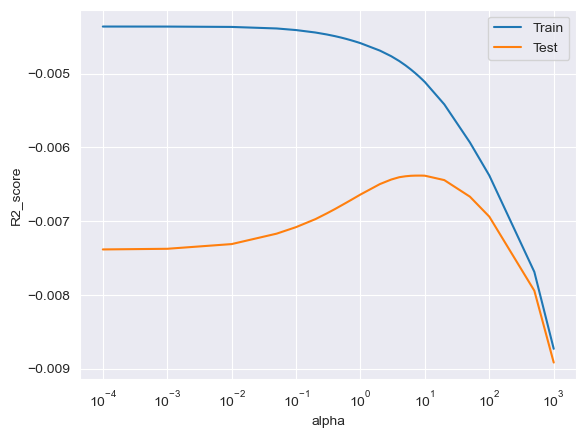

In [164]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [165]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [166]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.0001}

In [167]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.09084339, 0.04704924, 0.0292707 , 0.02198215, 0.03281431,
        0.02076707, 0.02219005, 0.01963305, 0.02044582, 0.02536049,
        0.0246769 , 0.01913395, 0.0200561 , 0.02107153, 0.0210412 ,
        0.02465506, 0.02165003, 0.0188467 , 0.01820183, 0.01960363,
        0.02073283, 0.02057509, 0.02393804, 0.01852999, 0.02242618,
        0.01943173, 0.02891798, 0.02298951]),
 'std_fit_time': array([0.01312944, 0.00854907, 0.00411827, 0.00362371, 0.0044264 ,
        0.00267815, 0.00604675, 0.00273185, 0.00326108, 0.0063401 ,
        0.00933117, 0.00096936, 0.00073614, 0.00491763, 0.00210131,
        0.00305319, 0.00505079, 0.00082287, 0.00038945, 0.00321164,
        0.00410106, 0.00200488, 0.00631249, 0.00100893, 0.00349742,
        0.00258021, 0.01054249, 0.00227167]),
 'mean_score_time': array([0.00761666, 0.00963483, 0.01085262, 0.00644989, 0.00909443,
        0.00696354, 0.00912657, 0.00662198, 0.00721841, 0.00721145,
        0.00730042, 0.00662494, 0.006613

In [168]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.0001)

In [169]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [170]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 1.85976932e-04,  1.91400560e-03,  1.61249916e-04,  2.82818304e-03,
        6.05301526e-04, -0.00000000e+00,  4.95029609e-03,  1.03236992e-03,
        2.52780434e-03,  0.00000000e+00,  6.65174603e-03, -5.29229878e-04,
        3.09879140e-03,  6.46922164e-04,  7.56676579e-04,  0.00000000e+00,
        0.00000000e+00,  9.39915201e-04,  0.00000000e+00,  0.00000000e+00,
        4.81612198e-04,  3.67917975e-04,  1.72569629e-03, -3.75730633e-03,
        0.00000000e+00, -0.00000000e+00, -9.84562267e-04, -0.00000000e+00,
        2.82389565e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  5.07062244e-05, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.96504804e-04,
       -3.99115182e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.16843487e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.11079896e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [171]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)


In [172]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.89
RSS (Train) = 0.07
RSS (Test) = 0.02
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


In [173]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.09,0.01,0.01,0.00,0.00,{'alpha': 0.0001},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,1,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00
1,0.05,0.01,0.01,0.01,0.00,{'alpha': 0.001},-0.01,-0.01,-0.01,-0.01,...,-0.01,0.00,2,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00
2,0.03,0.00,0.01,0.01,0.01,{'alpha': 0.01},-0.02,-0.02,-0.02,-0.02,...,-0.02,0.00,3,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
3,0.02,0.00,0.01,0.00,0.05,{'alpha': 0.05},-0.02,-0.03,-0.02,-0.02,...,-0.02,0.00,4,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
4,0.03,0.00,0.01,0.00,0.10,{'alpha': 0.1},-0.02,-0.03,-0.02,-0.02,...,-0.02,0.00,4,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
5,0.02,0.00,0.01,0.00,0.20,{'alpha': 0.2},-0.02,-0.03,-0.02,-0.02,...,-0.02,0.00,4,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
6,0.02,0.01,0.01,0.00,0.30,{'alpha': 0.3},-0.02,-0.03,-0.02,-0.02,...,-0.02,0.00,4,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
7,0.02,0.00,0.01,0.00,0.40,{'alpha': 0.4},-0.02,-0.03,-0.02,-0.02,...,-0.02,0.00,4,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
8,0.02,0.00,0.01,0.00,0.50,{'alpha': 0.5},-0.02,-0.03,-0.02,-0.02,...,-0.02,0.00,4,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
9,0.03,0.01,0.01,0.00,0.60,{'alpha': 0.6},-0.02,-0.03,-0.02,-0.02,...,-0.02,0.00,4,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00


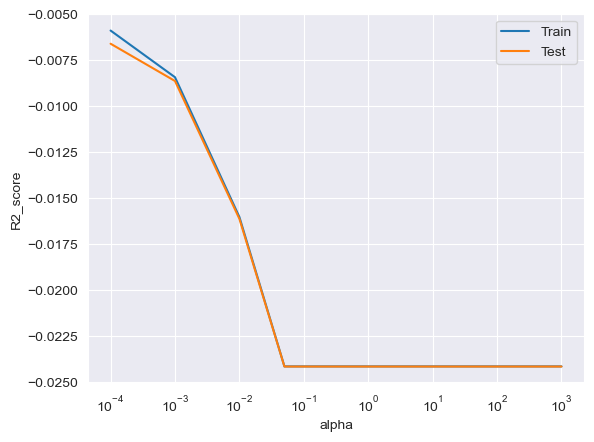

In [174]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [175]:
## Setting float display options
pd.options.display.float_format = "{:,.2f}".format

In [176]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.94,0.92
R2 Score (Test),0.90,0.89
RSS (Train),0.05,0.07
RSS (Test),0.02,0.02
MSE (Train),0.00,0.00
MSE (Test),0.00,0.00
RMSE (Train),0.01,0.01
RMSE (Test),0.01,0.01


In [177]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [178]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [179]:
## View the betas/coefficients
betas 

,Ridge,Lasso
LotFrontage,0.00,0.00
LotArea,0.00,0.00
MasVnrArea,0.00,0.00
BsmtFinSF1,0.00,0.00
BsmtFinSF2,0.00,0.00
...,...,...
SaleCondition_AdjLand,0.00,0.00
SaleCondition_Alloca,0.00,0.00
SaleCondition_Family,-0.00,-0.00
SaleCondition_Normal,0.00,0.00


In [180]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
BsmtUnfSF,-0.00,-0.00
LowQualFinSF,0.00,0.00
EnclosedPorch,0.00,0.00
3SsnPorch,0.00,0.00
PoolArea,0.00,0.00
...,...,...
SaleType_Oth,-0.00,-0.00
SaleType_WD,-0.00,-0.00
SaleCondition_AdjLand,0.00,0.00
SaleCondition_Alloca,0.00,0.00


In [181]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape


(225, 2)

In [182]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage             0.00
LotArea                 0.00
MasVnrArea              0.00
BsmtFinSF1              0.00
BsmtFinSF2              0.00
                        ... 
GarageCond_TA           0.00
PavedDrive_Y            0.00
SaleType_New            0.00
SaleCondition_Normal    0.00
SaleCondition_Partial   0.00
Name: Lasso, Length: 78, dtype: float64

In [183]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9          0.01
OverallQual_8          0.01
OverallCond_9          0.01
Neighborhood_Crawfor   0.01
GrLivArea              0.01
OverallCond_8          0.01
Functional_Typ         0.01
TotalBsmtSF            0.00
BsmtCond_Gd            0.00
BsmtFullBath_2         0.00
Name: Ridge, dtype: float64

In [184]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.01
OverallQual_8          1.01
OverallCond_9          1.01
Neighborhood_Crawfor   1.01
GrLivArea              1.01
OverallCond_8          1.01
Functional_Typ         1.01
TotalBsmtSF            1.00
BsmtCond_Gd            1.00
BsmtFullBath_2         1.00
Name: Ridge, dtype: float64

In [185]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.01
OverallQual_8          0.01
GrLivArea              0.01
KitchenAbvGr_1         0.01
Neighborhood_Crawfor   0.01
Functional_Typ         0.01
TotalBsmtSF            0.00
SaleType_New           0.00
Exterior1st_BrkFace    0.00
Neighborhood_Somerst   0.00
Name: Lasso, dtype: float64

In [186]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.01
OverallQual_8          1.01
GrLivArea              1.01
KitchenAbvGr_1         1.01
Neighborhood_Crawfor   1.01
Functional_Typ         1.01
TotalBsmtSF            1.00
SaleType_New           1.00
Exterior1st_BrkFace    1.00
Neighborhood_Somerst   1.00
Name: Lasso, dtype: float64

### Subjective question 1

In [187]:
## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=16)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=16)

In [188]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [189]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.90
RSS (Train) = 0.05
RSS (Test) = 0.02
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


In [190]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.0002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [191]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)


In [192]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.88
RSS (Train) = 0.08
RSS (Test) = 0.03
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


In [193]:
# Again creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')# Again creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.94,0.91
R2 Score (Test),0.90,0.88
RSS (Train),0.05,0.08
RSS (Test),0.02,0.03
MSE (Train),0.00,0.00
MSE (Test),0.00,0.00
RMSE (Train),0.01,0.01
RMSE (Test),0.01,0.01


📌 ## Changes in Ridge Regression metrics:¶
#### R2 score of train set decreased from 0.94 to 0.94
#### R2 score of test set remained same at 0.90
📌 ## Changes in Lasso metrics:
#### R2 score of train set decreased from 0.92 to 0.91
#### R2 score of test set decreased from 0.89 to 0.88

In [194]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [195]:
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_8          0.01
GrLivArea              0.01
OverallQual_9          0.01
Neighborhood_Crawfor   0.00
Functional_Typ         0.00
OverallCond_9          0.00
TotalBsmtSF            0.00
OverallCond_8          0.00
2ndFlrSF               0.00
BsmtCond_Gd            0.00
Name: Ridge, dtype: float64

In [196]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_8          1.01
GrLivArea              1.01
OverallQual_9          1.01
Neighborhood_Crawfor   1.00
Functional_Typ         1.00
OverallCond_9          1.00
TotalBsmtSF            1.00
OverallCond_8          1.00
2ndFlrSF               1.00
BsmtCond_Gd            1.00
Name: Ridge, dtype: float64

In [197]:
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.01
OverallQual_8          0.01
TotalBsmtSF            0.01
Functional_Typ         0.00
KitchenAbvGr_1         0.00
Neighborhood_Crawfor   0.00
GarageArea             0.00
OverallQual_9          0.00
Foundation_PConc       0.00
BsmtFinSF1             0.00
Name: Lasso, dtype: float64

In [198]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.01
OverallQual_8          1.01
TotalBsmtSF            1.01
Functional_Typ         1.00
KitchenAbvGr_1         1.00
Neighborhood_Crawfor   1.00
GarageArea             1.00
OverallQual_9          1.00
Foundation_PConc       1.00
BsmtFinSF1             1.00
Name: Lasso, dtype: float64

### subjective question 3

In [199]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'KitchenAbvGr_1']


In [200]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)


In [201]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [202]:
lassoCV.best_params_

{'alpha': 0.0001}

In [203]:
lasso = Lasso(alpha=0.0001)

In [204]:
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.0001)

In [205]:
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)


In [206]:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)


R-Squared (Train) = 0.92
R-Squared (Test) = 0.88
RSS (Train) = 0.07
RSS (Test) = 0.03
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


In [207]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas['Lasso'] = lasso.coef_
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF              0.01
1stFlrSF              0.01
Functional_Typ        0.01
TotalBsmtSF           0.01
Exterior1st_BrkFace   0.00
Name: Lasso, dtype: float64